In [129]:
# Packages

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

In [130]:
# Trim pfam annotation

def trimAnnotPfam(path):
    curedFile = []
    with open(path) as f:
        contents = f.readlines()
    for i in contents:
        if 'TRINITY' in i:
            curedFile.append(i)
    geneNames=[] ; pfamAnnot= [] ; pfamCode = []
    separator = "PF"
    for i in range(len(curedFile)):
        geneNames.append(curedFile[i].split(" - ",1)[0])
        splitDash = curedFile[i].split(" - ",1)[1]
        splitAnnot = splitDash.split(separator,1)[0] ; splitAnnot = splitAnnot.strip()
        splitCode = splitDash.split(separator,1)[1] ; splitCode = splitCode.split(".",1)[0] ; splitCode = separator + splitCode
        pfamAnnot.append(splitAnnot) ; pfamCode.append(splitCode)
    dic={'genes':geneNames,'pfam_annotation':pfamAnnot,'pfam_code':pfamCode}
    mergeDf=pd.DataFrame(dic) 
    return mergeDf

H_pfam = trimAnnotPfam('/Users/mmeynadier/Documents/kelpProject/hmmer/pfam_table_Hedophylum.table')
S_pfam = trimAnnotPfam('/Users/mmeynadier/Documents/kelpProject/hmmer/pfam_table_Saccharina.table') 

In [131]:
def trimAnnotEggnog(path):
    curedFile = []
    with open(path) as f:
        contents = f.readlines()
    f.close()
    for i in contents:
        if 'TRINITY' in i:
            curedFile.append(i)
    geneName = [] ; function = [] ; protName = [] ; pfamDomain = []
    for i in curedFile:
        splitElement = i.split('\t')
        tx = splitElement[0]
        tx = tx.rsplit('_',1)[0]
        geneName.append(tx)
        function.append(splitElement[7])
        protName.append(splitElement[8])
        pfamDomain.append(splitElement[-1].replace('\n',''))
    dic = {'genes':geneName,'function':function,'protein':protName,'pfam_domains':pfamDomain}
    df=pd.DataFrame(dic)
    df=df.drop_duplicates(subset='genes',ignore_index=False)
    return df

H_eggnog = trimAnnotEggnog('/Users/mmeynadier/Documents/kelpProject/eggnog/eggnogAnnotHedophylum')
S_eggnog = trimAnnotEggnog('/Users/mmeynadier/Documents/kelpProject/eggnog/eggnogAnnotSaccharina') 

In [132]:
H_eggnog

,genes,function,protein,pfam_domains
0,TRINITY_DN33989_c0_g1,dynein light chain binding,-,"AAA_5,AAA_6,AAA_7,AAA_8,AAA_9,DHC_N1,DHC_N2,Dy..."
1,TRINITY_DN10156_c0_g1,protein transport to vacuole involved in ubiqu...,HERC1,"CLTH,HECT,RCC1,SPRY,WD40"
2,TRINITY_DN8161_c0_g1,enzyme-directed rRNA 2'-O-methylation,TARBP1,SpoU_methylase
4,TRINITY_DN13066_c0_g1,modulation by host of viral RNA genome replica...,-,"F-box,F-box-like,LRR_6"
5,TRINITY_DN2259_c0_g1,-,-,"Beta_helix,Chlam_PMP"
...,...,...,...,...
18833,TRINITY_DN29610_c0_g1,regulation of parkin-mediated stimulation of m...,-,"SHR-BD,VPS13_mid_rpt"
18834,TRINITY_DN54111_c0_g1,"Serine/Threonine protein kinases, catalytic do...",-,Pkinase
18835,TRINITY_DN67147_c0_g1,Pfam:RRM_6,-,RRM_1
18836,TRINITY_DN32416_c0_g1,positive regulation of translational fidelity,-,"Ribosomal_S4,S4"


In [133]:
S_eggnog

,genes,function,protein,pfam_domains
0,TRINITY_DN1033_c0_g1,aspartic-type endopeptidase activity,-,"Asp,TAXi_C,TAXi_N"
2,TRINITY_DN1220_c0_g1,structural molecule activity,-,-
3,TRINITY_DN8467_c0_g1,enzyme-directed rRNA 2'-O-methylation,TARBP1,SpoU_methylase
5,TRINITY_DN1211_c0_g1,-,-,-
6,TRINITY_DN337_c0_g1,MULE transposase domain,FHY3,"FAR1,MULE,SWIM"
...,...,...,...,...
19955,TRINITY_DN79345_c0_g1,It is involved in the biological process descr...,RPL7A,Ribosomal_L7Ae
19956,TRINITY_DN21382_c0_g1,glutamine synthetase,GLUL,"Gln-synt_C,Gln-synt_N"
19957,TRINITY_DN109888_c0_g1,coreceptor activity involved in Wnt signaling ...,SSPO,"C8,F5_F8_type_C,Ldl_recept_a,Pacifastin_I,TIL,..."
19958,TRINITY_DN49854_c0_g1,intra-Golgi vesicle-mediated transport,COG5,COG5


In [134]:
geneList = H_pfam['genes']
newList = []
for i in geneList:
    gene = i.rsplit('_',1)[0]
    newList.append(gene)

H_pfam['genes'] = newList
H_pfam = H_pfam.drop_duplicates(subset='genes',ignore_index=False)
H_pfam

,genes,pfam_annotation,pfam_code
0,TRINITY_DN17112_c0_g1,165 1-cysPrx_C,PF10417
1,TRINITY_DN1144_c0_g1,279 14-3-3,PF00244
2,TRINITY_DN1144_c2_g1,228 14-3-3,PF00244
3,TRINITY_DN13187_c0_g1,244 14-3-3,PF00244
4,TRINITY_DN28498_c0_g1,259 14-3-3,PF00244
...,...,...,...
32800,TRINITY_DN59883_c0_g1,104 Zip,PF02535
32801,TRINITY_DN88736_c0_g1,128 Zip,PF02535
32802,TRINITY_DN148_c6_g1,413 Zip,PF02535
32805,TRINITY_DN4476_c2_g1,340 Zw10,PF06248


In [135]:
geneList = S_pfam['genes']
newList = []
for i in geneList:
    gene = i.rsplit('_',1)[0]
    newList.append(gene)

S_pfam['genes'] = newList
S_pfam = S_pfam.drop_duplicates(subset='genes',ignore_index=False)
S_pfam

,genes,pfam_annotation,pfam_code
0,TRINITY_DN20833_c1_g1,144 1-cysPrx_C,PF10417
1,TRINITY_DN27336_c0_g1,109 1-cysPrx_C,PF10417
2,TRINITY_DN15598_c0_g1,196 1-cysPrx_C,PF10417
3,TRINITY_DN17500_c0_g1,275 14-3-3,PF00244
4,TRINITY_DN4220_c0_g2,264 14-3-3,PF00244
...,...,...,...
31432,TRINITY_DN100535_c0_g1,153 Zw10,PF06248
31434,TRINITY_DN57474_c0_g1,289 ZYG-11_interact,PF05884
31435,TRINITY_DN18311_c0_g1,267 ZYG-11_interact,PF05884
31436,TRINITY_DN17998_c0_g1,163 ZZ,PF00569


In [136]:
S_all_annot = pd.merge(S_pfam,S_eggnog,on='genes',how='inner')
S_all_annot

,genes,pfam_annotation,pfam_code,function,protein,pfam_domains
0,TRINITY_DN20833_c1_g1,144 1-cysPrx_C,PF10417,C-terminal domain of 1-Cys peroxiredoxin,PRDX4,"1-cysPrx_C,AhpC-TSA"
1,TRINITY_DN27336_c0_g1,109 1-cysPrx_C,PF10417,C-terminal domain of 1-Cys peroxiredoxin,PRDX1,"1-cysPrx_C,AhpC-TSA"
2,TRINITY_DN15598_c0_g1,196 1-cysPrx_C,PF10417,Tsa family,-,"1-cysPrx_C,AhpC-TSA"
3,TRINITY_DN17500_c0_g1,275 14-3-3,PF00244,14-3-3 homologues,14-3-3zeta,14-3-3
4,TRINITY_DN4220_c0_g2,264 14-3-3,PF00244,protein domain specific binding,-,14-3-3
...,...,...,...,...,...,...
10647,TRINITY_DN100535_c0_g1,153 Zw10,PF06248,spindle assembly checkpoint,ZW10,Zw10
10648,TRINITY_DN57474_c0_g1,289 ZYG-11_interact,PF05884,"mRNA, complete cds",-,ZYG-11_interact
10649,TRINITY_DN18311_c0_g1,267 ZYG-11_interact,PF05884,"mRNA, complete cds",-,ZYG-11_interact
10650,TRINITY_DN17998_c0_g1,163 ZZ,PF00569,perineurial glial growth,-,"E3_UbLigase_R4,ZZ"


In [137]:
H_all_annot = pd.merge(H_pfam,H_eggnog,on='genes',how='inner')
H_all_annot

,genes,pfam_annotation,pfam_code,function,protein,pfam_domains
0,TRINITY_DN17112_c0_g1,165 1-cysPrx_C,PF10417,Tsa family,-,"1-cysPrx_C,AhpC-TSA"
1,TRINITY_DN1144_c0_g1,279 14-3-3,PF00244,protein domain specific binding,-,14-3-3
2,TRINITY_DN1144_c2_g1,228 14-3-3,PF00244,protein domain specific binding,-,14-3-3
3,TRINITY_DN13187_c0_g1,244 14-3-3,PF00244,14-3-3 homologues,-,14-3-3
4,TRINITY_DN28498_c0_g1,259 14-3-3,PF00244,Belongs to the 14-3-3 family,14-3-3zeta,14-3-3
...,...,...,...,...,...,...
9518,TRINITY_DN59883_c0_g1,104 Zip,PF02535,ZIP family transporter,-,Zip
9519,TRINITY_DN88736_c0_g1,128 Zip,PF02535,Zinc (Zn2)-Iron (Fe2) Permease (ZIP) family. S...,-,Zip
9520,TRINITY_DN148_c6_g1,413 Zip,PF02535,cellular zinc ion homeostasis,-,Zip
9521,TRINITY_DN4476_c2_g1,340 Zw10,PF06248,spindle assembly checkpoint,ZW10,Zw10


In [138]:
rPath = os.getcwd()
#candidatesGenesPath = rPath + "/candidateGenes.csv"
dataPathSaccharina = rPath + "/DESeq2/Saccharina/"
S_C_VS_T1 = dataPathSaccharina+"S_C_VS_T1.csv"
S_C_VS_T2 = dataPathSaccharina+"S_C_VS_T2.csv"
S_C_VS_T3 = dataPathSaccharina+"S_C_VS_T3.csv"
S_T1_VS_T2 = dataPathSaccharina+"S_T1_VS_T2.csv"
S_T1_VS_T3 = dataPathSaccharina+"S_T1_VS_T3.csv"
S_T2_VS_T3 = dataPathSaccharina+"S_T2_VS_T3.csv"

dataPathHedophylum = rPath + "/DESeq2/Hedophylum/"
H_C_VS_T1 = dataPathHedophylum+"H_C_VS_T1.csv"
H_C_VS_T2 = dataPathHedophylum+"H_C_VS_T2.csv"
H_C_VS_T3 = dataPathHedophylum+"H_C_VS_T3.csv"
H_T1_VS_T2 = dataPathHedophylum+"H_T1_VS_T2.csv"
H_T1_VS_T3 = dataPathHedophylum+"H_T1_VS_T3.csv"
H_T2_VS_T3 = dataPathHedophylum+"H_T2_VS_T3.csv"

In [139]:
S_C_VS_T1 = pd.read_csv(S_C_VS_T1,sep=',')
S_C_VS_T2 = pd.read_csv(S_C_VS_T2,sep=',')
S_C_VS_T3 = pd.read_csv(S_C_VS_T3,sep=',')
S_T1_VS_T2 = pd.read_csv(S_T1_VS_T2,sep=',')
S_T1_VS_T3 = pd.read_csv(S_T1_VS_T3,sep=',')
S_T2_VS_T3 = pd.read_csv(S_T2_VS_T3,sep=',')

H_C_VS_T1 = pd.read_csv(H_C_VS_T1,sep=',')
H_C_VS_T2 = pd.read_csv(H_C_VS_T2,sep=',')
H_C_VS_T3 = pd.read_csv(H_C_VS_T3,sep=',')
H_T1_VS_T2 = pd.read_csv(H_T1_VS_T2,sep=',')
H_T1_VS_T3 = pd.read_csv(H_T1_VS_T3,sep=',')
H_T2_VS_T3 = pd.read_csv(H_T2_VS_T3,sep=',')

In [140]:
S_C_VS_T1 = S_C_VS_T1.rename(columns={'Unnamed: 0':'genes'})
S_C_VS_T2 = S_C_VS_T2.rename(columns={'Unnamed: 0':'genes'})
S_C_VS_T3 = S_C_VS_T3.rename(columns={'Unnamed: 0':'genes'})
S_T1_VS_T2 = S_T1_VS_T2.rename(columns={'Unnamed: 0':'genes'})
S_T1_VS_T3  = S_T1_VS_T3 .rename(columns={'Unnamed: 0':'genes'})
S_T2_VS_T3 = S_T2_VS_T3.rename(columns={'Unnamed: 0':'genes'})

H_C_VS_T1 = H_C_VS_T1.rename(columns={'Unnamed: 0':'genes'})
H_C_VS_T2 = H_C_VS_T2.rename(columns={'Unnamed: 0':'genes'})
H_C_VS_T3 = H_C_VS_T3.rename(columns={'Unnamed: 0':'genes'})
H_T1_VS_T2 = H_T1_VS_T2.rename(columns={'Unnamed: 0':'genes'})
H_T1_VS_T3  = H_T1_VS_T3 .rename(columns={'Unnamed: 0':'genes'})
H_T2_VS_T3 = H_T2_VS_T3.rename(columns={'Unnamed: 0':'genes'})

In [141]:
# Filter by p-adjusted & log2foldchange 

S_C_VS_T1 = S_C_VS_T1[S_C_VS_T1['padj']<0.05]
S_C_VS_T1= S_C_VS_T1[(S_C_VS_T1['log2FoldChange']<-2) | (S_C_VS_T1['log2FoldChange']>2)]
S_C_VS_T2 = S_C_VS_T2 [S_C_VS_T2 ['padj']<0.05]
S_C_VS_T2= S_C_VS_T2[(S_C_VS_T2['log2FoldChange']<-2) | (S_C_VS_T2['log2FoldChange']>2)]
S_C_VS_T3 = S_C_VS_T3[S_C_VS_T3['padj']<0.05]
S_C_VS_T3= S_C_VS_T3[(S_C_VS_T3['log2FoldChange']<-2) | (S_C_VS_T3['log2FoldChange']>2)]
S_T1_VS_T2 = S_T1_VS_T2[S_T1_VS_T2['padj']<0.05]
S_T1_VS_T2= S_T1_VS_T2[(S_T1_VS_T2['log2FoldChange']<-2) | (S_T1_VS_T2['log2FoldChange']>2)]
S_T1_VS_T3 = S_T1_VS_T3[S_T1_VS_T3['padj']<0.05]
S_T1_VS_T3= S_T1_VS_T3[(S_T1_VS_T3['log2FoldChange']<-2) | (S_T1_VS_T3['log2FoldChange']>2)]
S_T2_VS_T3 = S_T2_VS_T3[S_T2_VS_T3['padj']<0.05]
S_T2_VS_T3= S_T2_VS_T3[(S_T2_VS_T3['log2FoldChange']<-2) | (S_T2_VS_T3['log2FoldChange']>2)]

H_C_VS_T1 = H_C_VS_T1[H_C_VS_T1['padj']<0.05]
H_C_VS_T1= H_C_VS_T1[(H_C_VS_T1['log2FoldChange']<-2) | (H_C_VS_T1['log2FoldChange']>2)]
H_C_VS_T2 = H_C_VS_T2 [H_C_VS_T2 ['padj']<0.05]
H_C_VS_T2= H_C_VS_T2[(H_C_VS_T2['log2FoldChange']<-2) | (H_C_VS_T2['log2FoldChange']>2)]
H_C_VS_T3 = H_C_VS_T3[H_C_VS_T3['padj']<0.05]
H_C_VS_T3= H_C_VS_T3[(H_C_VS_T3['log2FoldChange']<-2) | (H_C_VS_T3['log2FoldChange']>2)]
H_T1_VS_T2 = H_T1_VS_T2[H_T1_VS_T2['padj']<0.05]
H_T1_VS_T2= H_T1_VS_T2[(H_T1_VS_T2['log2FoldChange']<-2) | (H_T1_VS_T2['log2FoldChange']>2)]
H_T1_VS_T3 = H_T1_VS_T3[H_T1_VS_T3['padj']<0.05]
H_T1_VS_T3= H_T1_VS_T3[(H_T1_VS_T3['log2FoldChange']<-2) | (H_T1_VS_T3['log2FoldChange']>2)]
H_T2_VS_T3 = H_T2_VS_T3[H_T2_VS_T3['padj']<0.05]
H_T2_VS_T3= H_T2_VS_T3[(H_T2_VS_T3['log2FoldChange']<-2) | (H_T2_VS_T3['log2FoldChange']>2)]

In [142]:
S_C_VS_T1

,genes,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,TRINITY_DN11635_c0_g1,1815.126881,-10.171984,0.959776,-10.598293,3.034675e-26,1.510206e-21
1,TRINITY_DN1480_c0_g1,1172.275807,8.649431,0.891576,9.701287,2.977185e-22,7.407980e-18
2,TRINITY_DN61359_c0_g1,3475.624267,-8.715265,0.917081,-9.503270,2.033998e-21,3.374063e-17
3,TRINITY_DN93105_c0_g1,1037.874698,-7.905836,0.874340,-9.042060,1.537472e-19,1.912808e-15
4,TRINITY_DN182_c0_g1,1815.114863,-9.121599,1.072794,-8.502659,1.852959e-17,1.844250e-13
...,...,...,...,...,...,...,...
309,TRINITY_DN109655_c0_g1,26.234904,-7.382710,2.044789,-3.610500,3.056069e-04,4.874529e-02
310,TRINITY_DN65250_c0_g1,19.348347,-8.136976,2.253688,-3.610516,3.055880e-04,4.874529e-02
311,TRINITY_DN80863_c0_g1,120.057793,-3.271622,0.905798,-3.611866,3.040020e-04,4.874529e-02
312,TRINITY_DN83693_c0_g1,148.020628,-5.141311,1.424560,-3.609053,3.073168e-04,4.886140e-02


In [143]:
# Get all DEGs Saccharina 

all_S_deg = (pd.concat([S_C_VS_T1, S_C_VS_T2], ignore_index=True, sort =False)
        .drop_duplicates(['genes'], keep='last'))

all_S_deg = (pd.concat([all_S_deg, S_C_VS_T3], ignore_index=True, sort =False)
        .drop_duplicates(['genes'], keep='last'))


all_S_deg

,genes,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
1,TRINITY_DN1480_c0_g1,1172.275807,8.649431,0.891576,9.701287,2.977185e-22,7.407980e-18
5,TRINITY_DN814_c0_g1,298.534165,-10.950816,1.606835,-6.815147,9.416741e-12,4.056496e-08
7,TRINITY_DN2479_c1_g1,261.326422,10.757851,1.674087,6.426100,1.309192e-10,4.343461e-07
9,TRINITY_DN4676_c0_g1,239.012389,-30.000000,4.786611,-6.267482,3.669336e-10,9.130225e-07
11,TRINITY_DN112799_c0_g1,105.068522,-29.616034,4.785533,-6.188660,6.067792e-10,1.372562e-06
...,...,...,...,...,...,...,...
1074,TRINITY_DN27892_c0_g1,82.940256,-6.392701,1.850057,-3.455408,5.494607e-04,4.928334e-02
1075,TRINITY_DN50135_c0_g1,30.602572,-7.297219,2.112766,-3.453870,5.526043e-04,4.943231e-02
1076,TRINITY_DN60356_c0_g1,21.030259,-8.588692,2.486815,-3.453692,5.529688e-04,4.943231e-02
1077,TRINITY_DN20048_c0_g1,16.920729,-8.365613,2.423680,-3.451617,5.572386e-04,4.969339e-02


In [144]:
# Get all DEGs 

all_H_deg = (pd.concat([H_C_VS_T1, H_C_VS_T2], ignore_index=True, sort =False)
        .drop_duplicates(['genes'], keep='last'))

all_H_deg = (pd.concat([all_H_deg, H_C_VS_T3], ignore_index=True, sort =False)
        .drop_duplicates(['genes'], keep='last'))


all_H_deg

,genes,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
1,TRINITY_DN608_c0_g2,246.053374,-6.323257,0.918716,-6.882710,5.872455e-12,3.051034e-08
2,TRINITY_DN608_c0_g3,403.229295,-5.701042,0.928735,-6.138502,8.330331e-10,2.545896e-06
3,TRINITY_DN11017_c0_g1,13.926169,-20.979369,3.664413,-5.725165,1.033331e-08,1.988398e-05
5,TRINITY_DN1857_c0_g1,125.801538,-30.000000,5.844016,-5.133456,2.844695e-07,3.425375e-04
6,TRINITY_DN71610_c0_g1,1103.829840,3.810374,0.751360,5.071299,3.951089e-07,4.276642e-04
...,...,...,...,...,...,...,...
921,TRINITY_DN21229_c0_g1,44.361147,4.748518,1.285380,3.694253,2.205338e-04,4.693193e-02
922,TRINITY_DN20791_c0_g1,126.835796,3.507683,0.950513,3.690307,2.239832e-04,4.748613e-02
923,TRINITY_DN9293_c1_g1,27.098488,-5.231734,1.418950,-3.687046,2.268724e-04,4.791785e-02
924,TRINITY_DN352_c0_g1,51.790896,3.481076,0.945745,3.680778,2.325237e-04,4.856375e-02


In [145]:
all_S_deg_pfam = pd.merge(all_S_deg,S_pfam,how="inner",on="genes")
all_S_deg_pfam

,genes,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,pfam_annotation,pfam_code
0,TRINITY_DN814_c0_g1,298.534165,-10.950816,1.606835,-6.815147,9.416741e-12,4.056496e-08,204 EMC3_TMCO1,PF01956
1,TRINITY_DN112799_c0_g1,105.068522,-29.616034,4.785533,-6.188660,6.067792e-10,1.372562e-06,232 HNH,PF01844
2,TRINITY_DN12661_c0_g1,73.859196,-29.236883,4.785535,-6.109428,9.998870e-10,1.990375e-06,528 UDPGP,PF01704
3,TRINITY_DN10009_c0_g1,1806.884509,-25.811116,4.784782,-5.394418,6.874593e-08,7.437264e-05,434 Abhydrolase_1,PF00561
4,TRINITY_DN4290_c0_g1,574.135279,-25.826242,4.785125,-5.397193,6.769158e-08,7.437264e-05,1048 LRR_4,PF12799
...,...,...,...,...,...,...,...,...,...
222,TRINITY_DN10720_c0_g1,42.709552,-7.015113,2.025632,-3.463173,5.338455e-04,4.836123e-02,151 ATP-gua_Ptrans,PF00217
223,TRINITY_DN1220_c0_g1,1558.508784,-9.218770,2.666872,-3.456773,5.466855e-04,4.919533e-02,1984 RdRP_1,PF00680
224,TRINITY_DN27892_c0_g1,82.940256,-6.392701,1.850057,-3.455408,5.494607e-04,4.928334e-02,198 Ribosomal_S6e,PF01092
225,TRINITY_DN60356_c0_g1,21.030259,-8.588692,2.486815,-3.453692,5.529688e-04,4.943231e-02,129 Ribosomal_60s,PF00428


In [146]:
all_S_deg_eggnog = pd.merge(all_S_deg,S_eggnog,how="inner",on="genes")
all_S_deg_eggnog

,genes,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,function,protein,pfam_domains
0,TRINITY_DN814_c0_g1,298.534165,-10.950816,1.606835,-6.815147,9.416741e-12,4.056496e-08,endoplasmic reticulum calcium ion homeostasis,TMCO1,DUF106
1,TRINITY_DN4676_c0_g1,239.012389,-30.000000,4.786611,-6.267482,3.669336e-10,9.130225e-07,DnaJ Hsp40 cysteine-rich domain superfamily pr...,-,-
2,TRINITY_DN112799_c0_g1,105.068522,-29.616034,4.785533,-6.188660,6.067792e-10,1.372562e-06,reverse transcriptase,-,"GIIM,HNH,RVT_1,RVT_N"
3,TRINITY_DN12661_c0_g1,73.859196,-29.236883,4.785535,-6.109428,9.998870e-10,1.990375e-06,UTP:glucose-1-phosphate uridylyltransferase ac...,PGM2,"PGM_PMM_I,PGM_PMM_II,PGM_PMM_III,PGM_PMM_IV,UDPGP"
4,TRINITY_DN10009_c0_g1,1806.884509,-25.811116,4.784782,-5.394418,6.874593e-08,7.437264e-05,regulation of endocannabinoid signaling pathway,-,"Abhydrolase_1,Abhydrolase_6"
...,...,...,...,...,...,...,...,...,...,...
301,TRINITY_DN1220_c0_g1,1558.508784,-9.218770,2.666872,-3.456773,5.466855e-04,4.919533e-02,structural molecule activity,-,-
302,TRINITY_DN27892_c0_g1,82.940256,-6.392701,1.850057,-3.455408,5.494607e-04,4.928334e-02,Ribosomal protein S6e,-,Ribosomal_S6e
303,TRINITY_DN60356_c0_g1,21.030259,-8.588692,2.486815,-3.453692,5.529688e-04,4.943231e-02,ribosome biogenesis,RPLP0,"Ribosomal_60s,Ribosomal_L10"
304,TRINITY_DN20048_c0_g1,16.920729,-8.365613,2.423680,-3.451617,5.572386e-04,4.969339e-02,Belongs to the heat shock protein 70 family,-,HSP70


In [147]:
all_S_deg_annot = pd.merge(all_S_deg,S_all_annot,how="inner",on="genes")
all_S_deg_annot

,genes,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,pfam_annotation,pfam_code,function,protein,pfam_domains
0,TRINITY_DN814_c0_g1,298.534165,-10.950816,1.606835,-6.815147,9.416741e-12,4.056496e-08,204 EMC3_TMCO1,PF01956,endoplasmic reticulum calcium ion homeostasis,TMCO1,DUF106
1,TRINITY_DN112799_c0_g1,105.068522,-29.616034,4.785533,-6.188660,6.067792e-10,1.372562e-06,232 HNH,PF01844,reverse transcriptase,-,"GIIM,HNH,RVT_1,RVT_N"
2,TRINITY_DN12661_c0_g1,73.859196,-29.236883,4.785535,-6.109428,9.998870e-10,1.990375e-06,528 UDPGP,PF01704,UTP:glucose-1-phosphate uridylyltransferase ac...,PGM2,"PGM_PMM_I,PGM_PMM_II,PGM_PMM_III,PGM_PMM_IV,UDPGP"
3,TRINITY_DN10009_c0_g1,1806.884509,-25.811116,4.784782,-5.394418,6.874593e-08,7.437264e-05,434 Abhydrolase_1,PF00561,regulation of endocannabinoid signaling pathway,-,"Abhydrolase_1,Abhydrolase_6"
4,TRINITY_DN4290_c0_g1,574.135279,-25.826242,4.785125,-5.397193,6.769158e-08,7.437264e-05,1048 LRR_4,PF12799,regulation of response to stimulus,-,"LRR_8,Roc"
...,...,...,...,...,...,...,...,...,...,...,...,...
220,TRINITY_DN10720_c0_g1,42.709552,-7.015113,2.025632,-3.463173,5.338455e-04,4.836123e-02,151 ATP-gua_Ptrans,PF00217,Belongs to the ATP guanido phosphotransferase ...,F46H5.3,"ATP-gua_Ptrans,ATP-gua_PtransN"
221,TRINITY_DN1220_c0_g1,1558.508784,-9.218770,2.666872,-3.456773,5.466855e-04,4.919533e-02,1984 RdRP_1,PF00680,structural molecule activity,-,-
222,TRINITY_DN27892_c0_g1,82.940256,-6.392701,1.850057,-3.455408,5.494607e-04,4.928334e-02,198 Ribosomal_S6e,PF01092,Ribosomal protein S6e,-,Ribosomal_S6e
223,TRINITY_DN60356_c0_g1,21.030259,-8.588692,2.486815,-3.453692,5.529688e-04,4.943231e-02,129 Ribosomal_60s,PF00428,ribosome biogenesis,RPLP0,"Ribosomal_60s,Ribosomal_L10"


In [148]:
all_H_deg_pfam = pd.merge(all_H_deg,H_pfam,how="inner",on="genes")
all_H_deg_pfam

,genes,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,pfam_annotation,pfam_code
0,TRINITY_DN11017_c0_g1,13.926169,-20.979369,3.664413,-5.725165,1.033331e-08,0.000020,250 Epiplasmin,PF10992
1,TRINITY_DN608_c0_g1,3935.342327,-3.569913,0.755445,-4.725576,2.294640e-06,0.001834,1160 Chlam_PMP,PF02415
2,TRINITY_DN2117_c1_g1,28.733595,-9.913172,2.140552,-4.631128,3.636788e-06,0.002519,657 Patched,PF02460
3,TRINITY_DN568_c0_g1,3819.129957,2.494403,0.625709,3.986524,6.704832e-05,0.021241,476 Fea1,PF07692
4,TRINITY_DN5613_c0_g1,122.235424,4.525551,1.154188,3.920983,8.818852e-05,0.025658,266 EsV_1_7_cys,PF19114
...,...,...,...,...,...,...,...,...,...
139,TRINITY_DN10968_c0_g1,3401.372387,2.238191,0.584700,3.827932,1.292245e-04,0.031035,398 S-AdoMet_synt_C,PF02773
140,TRINITY_DN39358_c0_g1,120.461554,3.495801,0.914626,3.822110,1.323146e-04,0.031366,312 Alk_phosphatase,PF00245
141,TRINITY_DN569_c0_g1,7158.616251,2.373778,0.620818,3.823631,1.315005e-04,0.031366,370 UDPG_MGDP_dh,PF00984
142,TRINITY_DN14631_c0_g1,58.002536,-4.614140,1.208368,-3.818490,1.342711e-04,0.031696,256 Collagen,PF01391


In [149]:
all_H_deg_eggnog = pd.merge(all_H_deg,H_eggnog,how="inner",on="genes")
all_H_deg_eggnog

,genes,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,function,protein,pfam_domains
0,TRINITY_DN608_c0_g3,403.229295,-5.701042,0.928735,-6.138502,8.330331e-10,0.000003,-,-,"Beta_helix,Chlam_PMP"
1,TRINITY_DN608_c0_g1,3935.342327,-3.569913,0.755445,-4.725576,2.294640e-06,0.001834,-,-,"Beta_helix,Chlam_PMP"
2,TRINITY_DN2117_c1_g1,28.733595,-9.913172,2.140552,-4.631128,3.636788e-06,0.002519,cellular response to sterol depletion,PTCHD3,Patched
3,TRINITY_DN97339_c0_g1,118.171802,3.863445,0.870058,4.440446,8.977255e-06,0.005125,fatty acid biosynthetic process,-,"ADH_N,ADH_zinc_N,AMP-binding,Acyl_transf_1,Con..."
4,TRINITY_DN568_c0_g1,3819.129957,2.494403,0.625709,3.986524,6.704832e-05,0.021241,-,-,Fea1
...,...,...,...,...,...,...,...,...,...,...
215,TRINITY_DN569_c0_g1,7158.616251,2.373778,0.620818,3.823631,1.315005e-04,0.031366,"UDP-glucose/GDP-mannose dehydrogenase family, ...",-,"UDPG_MGDP_dh,UDPG_MGDP_dh_N"
216,TRINITY_DN14631_c0_g1,58.002536,-4.614140,1.208368,-3.818490,1.342711e-04,0.031696,Collagen triple helix repeat (20 copies),-,"Col_cuticle_N,Collagen"
217,TRINITY_DN5860_c0_g1,249.806815,2.698066,0.707669,3.812611,1.375065e-04,0.032056,alginic acid biosynthetic process,-,"Beta_helix,DUF1565,SLH"
218,TRINITY_DN40665_c0_g1,60.123274,4.429324,1.176446,3.765003,1.665471e-04,0.037730,protein kinase activity,-,Pkinase_Tyr


In [150]:
all_H_deg_annot = pd.merge(all_H_deg,H_pfam,how="inner",on="genes")
all_H_deg_annot

,genes,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,pfam_annotation,pfam_code
0,TRINITY_DN11017_c0_g1,13.926169,-20.979369,3.664413,-5.725165,1.033331e-08,0.000020,250 Epiplasmin,PF10992
1,TRINITY_DN608_c0_g1,3935.342327,-3.569913,0.755445,-4.725576,2.294640e-06,0.001834,1160 Chlam_PMP,PF02415
2,TRINITY_DN2117_c1_g1,28.733595,-9.913172,2.140552,-4.631128,3.636788e-06,0.002519,657 Patched,PF02460
3,TRINITY_DN568_c0_g1,3819.129957,2.494403,0.625709,3.986524,6.704832e-05,0.021241,476 Fea1,PF07692
4,TRINITY_DN5613_c0_g1,122.235424,4.525551,1.154188,3.920983,8.818852e-05,0.025658,266 EsV_1_7_cys,PF19114
...,...,...,...,...,...,...,...,...,...
139,TRINITY_DN10968_c0_g1,3401.372387,2.238191,0.584700,3.827932,1.292245e-04,0.031035,398 S-AdoMet_synt_C,PF02773
140,TRINITY_DN39358_c0_g1,120.461554,3.495801,0.914626,3.822110,1.323146e-04,0.031366,312 Alk_phosphatase,PF00245
141,TRINITY_DN569_c0_g1,7158.616251,2.373778,0.620818,3.823631,1.315005e-04,0.031366,370 UDPG_MGDP_dh,PF00984
142,TRINITY_DN14631_c0_g1,58.002536,-4.614140,1.208368,-3.818490,1.342711e-04,0.031696,256 Collagen,PF01391


In [151]:
S_C_VS_T1_annot = pd.merge(S_C_VS_T1,S_all_annot,how='inner',on='genes')
S_C_VS_T1_annot

,genes,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,pfam_annotation,pfam_code,function,protein,pfam_domains
0,TRINITY_DN8503_c1_g1,291.680837,-9.685691,1.335940,-7.250096,4.164769e-13,2.590746e-09,211 Peptidase_C1,PF00112,Belongs to the peptidase C1 family,-,"Inhibitor_I29,Peptidase_C1"
1,TRINITY_DN814_c0_g1,298.534165,-10.950816,1.606835,-6.815147,9.416741e-12,4.056496e-08,204 EMC3_TMCO1,PF01956,endoplasmic reticulum calcium ion homeostasis,TMCO1,DUF106
2,TRINITY_DN64126_c0_g1,1284.176892,-5.132780,0.764107,-6.717357,1.850506e-11,7.083878e-08,373 RCC1,PF00415,ubiquitin-protein transferase activity,-,"RCC1,RCC1_2"
3,TRINITY_DN3176_c0_g1,293.938951,-5.876665,0.884287,-6.645654,3.018741e-11,1.073055e-07,395 Actin,PF00022,ATP binding,ACT1,Actin
4,TRINITY_DN112799_c0_g1,105.068522,-29.616034,4.785533,-6.188660,6.067792e-10,1.372562e-06,232 HNH,PF01844,reverse transcriptase,-,"GIIM,HNH,RVT_1,RVT_N"
5,TRINITY_DN12661_c0_g1,73.859196,-29.236883,4.785535,-6.109428,9.998870e-10,1.990375e-06,528 UDPGP,PF01704,UTP:glucose-1-phosphate uridylyltransferase ac...,PGM2,"PGM_PMM_I,PGM_PMM_II,PGM_PMM_III,PGM_PMM_IV,UDPGP"
6,TRINITY_DN14840_c0_g1,138.473672,-7.458356,1.222436,-6.101222,1.052605e-09,2.014727e-06,469 GTP_EFTU,PF00009,Eukaryotic translation elongation factor 1 alpha,-,"GTP_EFTU,GTP_EFTU_D2,GTP_EFTU_D3"
7,TRINITY_DN92281_c0_g1,100.784560,-9.252736,1.611199,-5.742763,9.314395e-09,1.598382e-05,116 HSP90,PF00183,Hsp90 protein,-,"HATPase_c,HSP90"
8,TRINITY_DN17131_c0_g1,678.040797,-5.754332,1.004618,-5.727882,1.016925e-08,1.641849e-05,625 LRR_8,PF13855,regulation of response to stimulus,-,"LRRNT,LRR_8"
9,TRINITY_DN16306_c0_g1,64.640709,-7.394135,1.328733,-5.564803,2.624493e-08,3.529942e-05,281 HSP90,PF00183,unfolded protein binding,HSP83,"HATPase_c,HSP90"


In [152]:
H_C_VS_T1_annot = pd.merge(H_C_VS_T1,H_all_annot,how='inner',on='genes')
H_C_VS_T1_annot

,genes,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,pfam_annotation,pfam_code,function,protein,pfam_domains
0,TRINITY_DN1237_c0_g1,7531.876752,10.761431,0.906881,11.866420,1.768755e-32,9.189566e-28,137 Histone,PF00125,Histone H3.1-like,HIST3H3,Histone
1,TRINITY_DN887_c0_g1,1132.418296,5.881644,0.579308,10.152872,3.217541e-24,8.358367e-20,422 DUF4419,PF14388,Domain of unknown function (DUF4419),-,DUF4419
2,TRINITY_DN3249_c1_g1,98.887120,-12.387514,1.826300,-6.782848,1.178293e-11,5.565291e-08,240 Rad60-SLD,PF11976,Ubiquitin exists either covalently attached to...,UBB,ubiquitin
3,TRINITY_DN1842_c2_g1,339.244311,-11.925066,1.862977,-6.401082,1.542796e-10,5.725428e-07,101 Inhibitor_I29,PF08246,Belongs to the peptidase C1 family,-,"Inhibitor_I29,Peptidase_C1"
4,TRINITY_DN18841_c0_g1,884.828818,-4.341721,0.698983,-6.211484,5.248662e-10,1.704339e-06,468 PTE,PF02126,zinc ion binding,-,-
5,TRINITY_DN13072_c0_g1,97.194032,-11.706477,2.003583,-5.842771,5.133959e-09,1.111395e-05,248 HSP70,PF00012,Belongs to the heat shock protein 70 family,-,HSP70
6,TRINITY_DN289_c3_g1,672.312630,-5.136768,0.887137,-5.790273,7.027219e-09,1.404228e-05,778 Meth_synt_1,PF08267,5-methyltetrahydropteroyltriglutamate-homocyst...,-,"Meth_synt_1,Meth_synt_2"
7,TRINITY_DN12855_c0_g1,59.273336,-7.086101,1.319758,-5.369244,7.906731e-08,1.173698e-04,608 VWD,PF00094,Precursor of the egg-yolk proteins that are so...,-,"DUF1943,VWD,Vitellogenin_N"
8,TRINITY_DN7600_c0_g1,100.466671,-10.809872,2.016291,-5.361266,8.264061e-08,1.192665e-04,148 GTP_EFTU_D2,PF03144,translation elongation factor activity,EEF1A1,"GTP_EFTU,GTP_EFTU_D2,GTP_EFTU_D3"
9,TRINITY_DN1060_c0_g1,875.393670,3.011031,0.569409,5.287998,1.236624e-07,1.736454e-04,324 Glyco_hydro_114,PF03537,"Endo alpha-1,4 polygalactosaminidase",-,Glyco_hydro_114


In [153]:
S_C_VS_T2_annot = pd.merge(S_C_VS_T2,S_all_annot,how='inner',on='genes')
S_C_VS_T2_annot

,genes,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,pfam_annotation,pfam_code,function,protein,pfam_domains
0,TRINITY_DN4254_c0_g1,222.534278,-9.347084,1.356082,-6.892715,5.473737e-12,4.338940e-08,224 Methyltransf_3,PF01596,PFAM O-methyltransferase,-,Methyltransf_3
1,TRINITY_DN3176_c0_g1,293.938951,-8.025411,1.256244,-6.388415,1.676134e-10,5.314574e-07,395 Actin,PF00022,ATP binding,ACT1,Actin
2,TRINITY_DN5217_c0_g1,159.511359,-7.827588,1.401445,-5.585369,2.332049e-08,4.621440e-05,291 TMEM254,PF14934,3-beta-hydroxy-delta5-steroid dehydrogenase ac...,-,"3Beta_HSD,DUF4499,RmlD_sub_bind,dTDP_sugar_isom"
3,TRINITY_DN76013_c0_g1,135.834906,-7.002478,1.406373,-4.979106,6.387875e-07,7.790095e-04,282 PARP,PF00644,-,-,PARP
4,TRINITY_DN14840_c0_g1,138.473672,-12.372490,2.507772,-4.933658,8.070362e-07,8.926383e-04,469 GTP_EFTU,PF00009,Eukaryotic translation elongation factor 1 alpha,-,"GTP_EFTU,GTP_EFTU_D2,GTP_EFTU_D3"
5,TRINITY_DN983_c1_g1,92.846208,-6.421277,1.306907,-4.913341,8.953753e-07,9.463321e-04,128 Actin,PF00022,Belongs to the actin family,ACTB,Actin
6,TRINITY_DN75977_c0_g1,154.248961,-30.000000,6.252719,-4.797913,1.603276e-06,1.369225e-03,176 RVT_N,PF13655,reverse transcriptase,-,"GIIM,HNH,RVT_1,RVT_N"
7,TRINITY_DN95301_c0_g1,70.059841,-29.727105,6.252942,-4.754099,1.993336e-06,1.634570e-03,192 RVT_1,PF00078,PFAM RNA-directed DNA polymerase (Reverse tran...,-,"GIIM,HNH,RVT_1,RVT_N"
8,TRINITY_DN7401_c1_g1,140.860849,-9.050122,1.941443,-4.661543,3.138477e-06,2.296448e-03,123 Tubulin_C,PF03953,Tubulin is the major constituent of microtubul...,-,"Tubulin,Tubulin_C"
9,TRINITY_DN8503_c1_g1,291.680837,-10.893451,2.359096,-4.617637,3.881345e-06,2.714716e-03,211 Peptidase_C1,PF00112,Belongs to the peptidase C1 family,-,"Inhibitor_I29,Peptidase_C1"


In [154]:
H_C_VS_T2_annot = pd.merge(H_C_VS_T2,H_all_annot,how='inner',on='genes')
H_C_VS_T2_annot

,genes,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,pfam_annotation,pfam_code,function,protein,pfam_domains
0,TRINITY_DN1842_c2_g1,339.244311,-13.908677,1.862979,-7.465826,8.277855e-14,5.594588e-10,101 Inhibitor_I29,PF08246,Belongs to the peptidase C1 family,-,"Inhibitor_I29,Peptidase_C1"
1,TRINITY_DN289_c3_g1,672.312630,-6.658053,0.912950,-7.292899,3.033552e-13,1.640181e-09,778 Meth_synt_1,PF08267,5-methyltetrahydropteroyltriglutamate-homocyst...,-,"Meth_synt_1,Meth_synt_2"
2,TRINITY_DN18841_c0_g1,884.828818,-4.621520,0.700087,-6.601353,4.074218e-11,1.468566e-07,468 PTE,PF02126,zinc ion binding,-,-
3,TRINITY_DN7600_c0_g1,100.466671,-12.070043,2.016292,-5.986258,2.147240e-09,4.299887e-06,148 GTP_EFTU_D2,PF03144,translation elongation factor activity,EEF1A1,"GTP_EFTU,GTP_EFTU_D2,GTP_EFTU_D3"
4,TRINITY_DN3249_c1_g1,98.887120,-8.757990,1.474055,-5.941425,2.825544e-09,5.323023e-06,240 Rad60-SLD,PF11976,Ubiquitin exists either covalently attached to...,UBB,ubiquitin
...,...,...,...,...,...,...,...,...,...,...,...,...
96,TRINITY_DN14225_c0_g1,127.337581,-2.414646,0.693538,-3.481635,4.983627e-04,4.598204e-02,304 SNARE_assoc,PF09335,SNARE associated Golgi protein,-,SNARE_assoc
97,TRINITY_DN1535_c0_g1,353.978127,-4.596170,1.321882,-3.476989,5.070795e-04,4.653353e-02,272 Chloroa_b-bind,PF00504,Chlorophyll A-B binding protein,-,Chloroa_b-bind
98,TRINITY_DN26408_c0_g1,14.832055,-9.964080,2.881894,-3.457476,5.452605e-04,4.897200e-02,105 Ribosomal_L27e,PF01777,ribosomal protein,-,Ribosomal_L27e
99,TRINITY_DN1097_c14_g1,43.950555,-5.234544,1.515264,-3.454542,5.512290e-04,4.926257e-02,153 GTP_EFTU_D2,PF03144,translation elongation factor activity,TEF1,"GTP_EFTU,GTP_EFTU_D2,GTP_EFTU_D3"


In [155]:
S_C_VS_T3_annot = pd.merge(S_C_VS_T3,S_all_annot,how='inner',on='genes')
S_C_VS_T3_annot

,genes,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,pfam_annotation,pfam_code,function,protein,pfam_domains
0,TRINITY_DN4954_c0_g1,178.656799,8.484166,1.097801,7.728328,1.089681e-14,1.180626e-10,780 B12-binding,PF02310,methylmalonyl-CoA mutase activity,MUT,"B12-binding,MM_CoA_mutase"
1,TRINITY_DN8503_c1_g1,291.680837,-11.718081,1.683288,-6.961422,3.368542e-12,1.658946e-08,211 Peptidase_C1,PF00112,Belongs to the peptidase C1 family,-,"Inhibitor_I29,Peptidase_C1"
2,TRINITY_DN3176_c0_g1,293.938951,-6.050094,0.894171,-6.766148,1.322562e-11,5.847107e-08,395 Actin,PF00022,ATP binding,ACT1,Actin
3,TRINITY_DN14840_c0_g1,138.473672,-9.496356,1.572667,-6.038376,1.556728e-09,3.123430e-06,469 GTP_EFTU,PF00009,Eukaryotic translation elongation factor 1 alpha,-,"GTP_EFTU,GTP_EFTU_D2,GTP_EFTU_D3"
4,TRINITY_DN7401_c1_g1,140.860849,-10.425151,1.785670,-5.838228,5.275881e-09,9.219687e-06,123 Tubulin_C,PF03953,Tubulin is the major constituent of microtubul...,-,"Tubulin,Tubulin_C"
...,...,...,...,...,...,...,...,...,...,...,...,...
173,TRINITY_DN10720_c0_g1,42.709552,-7.015113,2.025632,-3.463173,5.338455e-04,4.836123e-02,151 ATP-gua_Ptrans,PF00217,Belongs to the ATP guanido phosphotransferase ...,F46H5.3,"ATP-gua_Ptrans,ATP-gua_PtransN"
174,TRINITY_DN1220_c0_g1,1558.508784,-9.218770,2.666872,-3.456773,5.466855e-04,4.919533e-02,1984 RdRP_1,PF00680,structural molecule activity,-,-
175,TRINITY_DN27892_c0_g1,82.940256,-6.392701,1.850057,-3.455408,5.494607e-04,4.928334e-02,198 Ribosomal_S6e,PF01092,Ribosomal protein S6e,-,Ribosomal_S6e
176,TRINITY_DN60356_c0_g1,21.030259,-8.588692,2.486815,-3.453692,5.529688e-04,4.943231e-02,129 Ribosomal_60s,PF00428,ribosome biogenesis,RPLP0,"Ribosomal_60s,Ribosomal_L10"


In [156]:
H_C_VS_T3_annot = pd.merge(H_C_VS_T3,H_all_annot,how='inner',on='genes')
H_C_VS_T3_annot

,genes,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,pfam_annotation,pfam_code,function,protein,pfam_domains
0,TRINITY_DN887_c0_g1,1132.418296,4.404775,0.481903,9.140384,6.223104e-20,3.496264e-15,422 DUF4419,PF14388,Domain of unknown function (DUF4419),-,DUF4419
1,TRINITY_DN1842_c2_g1,339.244311,-11.318745,1.534197,-7.377634,1.611272e-13,1.005828e-09,101 Inhibitor_I29,PF08246,Belongs to the peptidase C1 family,-,"Inhibitor_I29,Peptidase_C1"
2,TRINITY_DN3249_c1_g1,98.887120,-6.430796,0.879187,-7.314483,2.583751e-13,1.209669e-09,240 Rad60-SLD,PF11976,Ubiquitin exists either covalently attached to...,UBB,ubiquitin
3,TRINITY_DN7600_c0_g1,100.466671,-10.979543,1.640963,-6.690916,2.217774e-11,7.787437e-08,148 GTP_EFTU_D2,PF03144,translation elongation factor activity,EEF1A1,"GTP_EFTU,GTP_EFTU_D2,GTP_EFTU_D3"
4,TRINITY_DN4326_c0_g1,85.811933,-10.731302,1.661907,-6.457224,1.066413e-10,2.853011e-07,174 Ribosomal_S17e,PF00833,Ribosomal S17,-,Ribosomal_S17e
5,TRINITY_DN12855_c0_g1,59.273336,-9.964059,1.658482,-6.007941,1.878944e-09,3.909734e-06,608 VWD,PF00094,Precursor of the egg-yolk proteins that are so...,-,"DUF1943,VWD,Vitellogenin_N"
6,TRINITY_DN13072_c0_g1,97.194032,-9.529002,1.591012,-5.989272,2.107829e-09,4.229358e-06,248 HSP70,PF00012,Belongs to the heat shock protein 70 family,-,HSP70
7,TRINITY_DN64827_c0_g1,530.516579,2.626060,0.462667,5.675918,1.379472e-08,1.845274e-05,572 WSC,PF01822,protein xylosyltransferase activity,-,"CAP,Chitin_bind_1,DUF1929,GLEYA,GSDH,Glyco_hyd..."
8,TRINITY_DN20706_c0_g1,46.201390,-9.874591,1.786701,-5.526717,3.262783e-08,3.900206e-05,226 Ribosomal_L4,PF00573,60S ribosomal protein L4 C-terminal domain,-,"Ribos_L4_asso_C,Ribosomal_L4"
9,TRINITY_DN28747_c0_g1,56.968542,-7.166991,1.323685,-5.414424,6.148642e-08,6.773392e-05,197 HSP70,PF00012,MreB/Mbl protein,SSA2,HSP70


In [157]:
S_T1_VS_T2_annot = pd.merge(S_T1_VS_T2,S_all_annot,how='inner',on='genes')
S_T1_VS_T2_annot

,genes,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,pfam_annotation,pfam_code,function,protein,pfam_domains
0,TRINITY_DN814_c0_g1,298.534165,11.373571,1.717953,6.620419,3.581810e-11,4.099620e-07,204 EMC3_TMCO1,PF01956,endoplasmic reticulum calcium ion homeostasis,TMCO1,DUF106
1,TRINITY_DN729_c5_g1,888.532554,-34.248973,6.249427,-5.480338,4.245139e-08,1.121272e-04,780 TPR_1,PF00515,determination of stomach left/right asymmetry,-,"NB-ARC,TPR_10,TPR_12,TPR_16,TPR_4,TPR_7,TPR_8"
2,TRINITY_DN3882_c0_g1,126.368819,-32.077552,6.251145,-5.131468,2.874911e-07,4.487083e-04,191 SDA1,PF05285,ribosomal large subunit export from nucleus,SDAD1,"NUC130_3NT,SDA1"
3,TRINITY_DN4290_c0_g1,574.135279,29.469060,6.080703,4.846325,1.257697e-06,1.349548e-03,1048 LRR_4,PF12799,regulation of response to stimulus,-,"LRR_8,Roc"
4,TRINITY_DN76013_c0_g1,135.834906,-6.570402,1.407049,-4.669632,3.017403e-06,2.629825e-03,282 PARP,PF00644,-,-,PARP
5,TRINITY_DN4254_c0_g1,222.534278,-6.034113,1.363690,-4.424841,9.651351e-06,6.904134e-03,224 Methyltransf_3,PF01596,PFAM O-methyltransferase,-,Methyltransf_3
6,TRINITY_DN10009_c0_g1,1806.884509,25.929217,6.080699,4.264184,2.006343e-05,1.211357e-02,434 Abhydrolase_1,PF00561,regulation of endocannabinoid signaling pathway,-,"Abhydrolase_1,Abhydrolase_6"
7,TRINITY_DN12311_c0_g1,125.392630,-4.864136,1.141033,-4.262925,2.017686e-05,1.211357e-02,231 WD40,PF00400,Guanine nucleotide-binding protein,GNB4,WD40
8,TRINITY_DN12941_c0_g1,103.543971,-5.197559,1.218808,-4.264460,2.003863e-05,1.211357e-02,151 ATP-synt_ab_C,PF00306,Produces ATP from ADP in the presence of a pro...,ATP5A1,"ATP-synt_ab,ATP-synt_ab_C,ATP-synt_ab_N"
9,TRINITY_DN12661_c0_g1,73.859196,25.925665,6.097807,4.251637,2.122133e-05,1.235046e-02,528 UDPGP,PF01704,UTP:glucose-1-phosphate uridylyltransferase ac...,PGM2,"PGM_PMM_I,PGM_PMM_II,PGM_PMM_III,PGM_PMM_IV,UDPGP"


In [158]:
H_T1_VS_T2_annot = pd.merge(H_T1_VS_T2,H_all_annot,how='inner',on='genes')
H_T1_VS_T2_annot

,genes,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,pfam_annotation,pfam_code,function,protein,pfam_domains
0,TRINITY_DN887_c0_g1,1132.418296,-5.008920,0.469164,-10.676276,1.314398e-26,6.273228e-22,422 DUF4419,PF14388,Domain of unknown function (DUF4419),-,DUF4419
1,TRINITY_DN1237_c0_g1,7531.876752,-7.169323,0.727474,-9.855092,6.515699e-23,1.554874e-18,137 Histone,PF00125,Histone H3.1-like,HIST3H3,Histone
2,TRINITY_DN64827_c0_g1,530.516579,-4.499411,0.495549,-9.079657,1.089171e-19,1.732762e-15,572 WSC,PF01822,protein xylosyltransferase activity,-,"CAP,Chitin_bind_1,DUF1929,GLEYA,GSDH,Glyco_hyd..."
3,TRINITY_DN608_c0_g1,3935.342327,4.544157,0.618644,7.345355,2.052138e-13,1.632373e-09,1160 Chlam_PMP,PF02415,-,-,"Beta_helix,Chlam_PMP"
4,TRINITY_DN2053_c2_g1,369.877942,5.831408,1.080681,5.396047,6.812503e-08,1.548287e-04,549 LRR_4,PF12799,regulation of response to stimulus,-,LRR_8
5,TRINITY_DN6431_c0_g1,465.637048,-5.378448,0.999635,-5.380413,7.431526e-08,1.612202e-04,728 peroxidase,PF00141,catalase activity,katG,peroxidase
6,TRINITY_DN6838_c0_g1,68.070250,-4.588463,0.863466,-5.314006,1.072409e-07,2.225342e-04,229 Chloroa_b-bind,PF00504,"photosynthesis, light harvesting",Lhca6,Chloroa_b-bind
7,TRINITY_DN5860_c0_g2,51.999856,-9.187818,1.819699,-5.049086,4.439297e-07,7.306011e-04,752 F5_F8_type_C,PF00754,alginic acid biosynthetic process,-,"Beta_helix,DUF1565,SLH"
8,TRINITY_DN63_c2_g1,41.005432,-8.450516,1.724358,-4.900673,9.550896e-07,1.303294e-03,106 Gp_dh_N,PF00044,glyceraldehyde-3-phosphate dehydrogenase (NAD(...,-,"Gp_dh_C,Gp_dh_N"
9,TRINITY_DN9660_c0_g1,6651.515580,-2.656122,0.541905,-4.901455,9.512944e-07,1.303294e-03,1405 Cation_ATPase,PF13246,sodium:potassium-exchanging ATPase activity,ATP4A,"Cation_ATPase,Cation_ATPase_C,Cation_ATPase_N,..."


In [159]:
S_T1_VS_T3_annot = pd.merge(S_T1_VS_T3,S_all_annot,how='inner',on='genes')
S_T1_VS_T3_annot

,genes,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,pfam_annotation,pfam_code,function,protein,pfam_domains
0,TRINITY_DN814_c0_g1,298.534165,11.801706,1.606495,7.346247,2.038491e-13,3.231756e-09,204 EMC3_TMCO1,PF01956,endoplasmic reticulum calcium ion homeostasis,TMCO1,DUF106
1,TRINITY_DN4954_c0_g1,178.656799,10.318141,1.523942,6.770693,1.281671e-11,1.011926e-07,780 B12-binding,PF02310,methylmalonyl-CoA mutase activity,MUT,"B12-binding,MM_CoA_mutase"
2,TRINITY_DN12661_c0_g1,73.859196,29.646802,4.785547,6.195071,5.825873e-10,3.463554e-06,528 UDPGP,PF01704,UTP:glucose-1-phosphate uridylyltransferase ac...,PGM2,"PGM_PMM_I,PGM_PMM_II,PGM_PMM_III,PGM_PMM_IV,UDPGP"
3,TRINITY_DN47318_c0_g1,119.279589,-4.879644,0.793563,-6.149029,7.795881e-10,4.119777e-06,730 RT_RNaseH,PF17917,K02A2.6-like,-,"RVT_1,Retrotrans_gag,gag-asp_proteas,rve,zf-CC..."
4,TRINITY_DN112799_c0_g1,105.068522,28.683447,4.786639,5.992398,2.067690e-09,8.195118e-06,232 HNH,PF01844,reverse transcriptase,-,"GIIM,HNH,RVT_1,RVT_N"
5,TRINITY_DN4290_c0_g1,574.135279,28.251975,4.784916,5.904383,3.539697e-09,1.202511e-05,1048 LRR_4,PF12799,regulation of response to stimulus,-,"LRR_8,Roc"
6,TRINITY_DN10009_c0_g1,1806.884509,27.912972,4.784850,5.833614,5.423939e-09,1.612300e-05,434 Abhydrolase_1,PF00561,regulation of endocannabinoid signaling pathway,-,"Abhydrolase_1,Abhydrolase_6"
7,TRINITY_DN5442_c0_g1,140.282199,-4.857033,1.051762,-4.617996,3.874640e-06,4.494676e-03,200 Methyltransf_5,PF01795,rRNA (cytosine-N4-)-methyltransferase activity,-,Methyltransf_5
8,TRINITY_DN43269_c0_g1,25.882462,9.146633,2.015368,4.538443,5.667108e-06,5.859420e-03,188 Linker_histone,PF00538,nucleosome assembly,H1F0,Linker_histone
9,TRINITY_DN5510_c0_g1,1651.757102,2.506264,0.588998,4.255132,2.089255e-05,1.774412e-02,718 Myb_DNA-binding,PF00249,Myb-like DNA-binding domain,-,Myb_DNA-binding


In [160]:
H_T1_VS_T3_annot = pd.merge(H_T1_VS_T3,H_all_annot,how='inner',on='genes')
H_T1_VS_T3_annot

,genes,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,pfam_annotation,pfam_code,function,protein,pfam_domains
0,TRINITY_DN1237_c0_g1,7531.876752,-11.202503,0.913231,-12.266887,1.363975e-34,7.086533e-30,137 Histone,PF00125,Histone H3.1-like,HIST3H3,Histone
1,TRINITY_DN608_c0_g1,3935.342327,4.357997,0.755364,5.769398,7.955503e-09,3.795369e-05,1160 Chlam_PMP,PF02415,-,-,"Beta_helix,Chlam_PMP"
2,TRINITY_DN83778_c0_g1,178.097186,4.178490,0.770488,5.423175,5.854971e-08,2.339962e-04,757 LRR_1,PF00560,regulation of response to stimulus,-,LRR_8
3,TRINITY_DN6767_c1_g1,274.876086,-3.437111,0.697466,-4.928000,8.307579e-07,2.538943e-03,310 Gal-3-0_sulfotr,PF06990,galactosylceramide sulfotransferase activity,GAL3ST3,Gal-3-0_sulfotr
4,TRINITY_DN18716_c0_g1,151.995296,6.281628,1.401832,4.481013,7.428971e-06,1.286574e-02,108 COX1,PF00115,Cytochrome c oxidase is the component of the r...,COX1,"COX1,COX2"
5,TRINITY_DN2948_c0_g1,350.824395,-2.619071,0.595727,-4.396432,1.100449e-05,1.545239e-02,519 GTP-bdg_M,PF16360,ribosome binding,-,"GTP-bdg_M,GTP-bdg_N,MMR_HSR1,TMEM141"
6,TRINITY_DN2117_c1_g1,28.733595,9.156690,2.145956,4.266952,1.981620e-05,2.144898e-02,657 Patched,PF02460,cellular response to sterol depletion,PTCHD3,Patched
7,TRINITY_DN2937_c0_g1,474.223648,10.250135,2.436137,4.207537,2.581696e-05,2.530793e-02,488 Choline_transpo,PF04515,choline transmembrane transporter activity,-,Choline_transpo


In [161]:
S_T2_VS_T3_annot = pd.merge(S_T2_VS_T3,S_all_annot,how='inner',on='genes')
S_T2_VS_T3_annot

,genes,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,pfam_annotation,pfam_code,function,protein,pfam_domains
0,TRINITY_DN729_c5_g1,888.532554,35.104874,6.249399,5.617320,1.939417e-08,0.000121,780 TPR_1,PF00515,determination of stomach left/right asymmetry,-,"NB-ARC,TPR_10,TPR_12,TPR_16,TPR_4,TPR_7,TPR_8"
1,TRINITY_DN4954_c0_g1,178.656799,9.939454,1.790057,5.552592,2.814643e-08,0.000156,780 B12-binding,PF02310,methylmalonyl-CoA mutase activity,MUT,"B12-binding,MM_CoA_mutase"
2,TRINITY_DN4254_c0_g1,222.534278,6.418963,1.363203,4.708736,2.492579e-06,0.003264,224 Methyltransf_3,PF01596,PFAM O-methyltransferase,-,Methyltransf_3
3,TRINITY_DN76013_c0_g1,135.834906,6.350129,1.407603,4.511307,6.442938e-06,0.006970,282 PARP,PF00644,-,-,PARP
4,TRINITY_DN5217_c0_g1,159.511359,6.268969,1.404030,4.464984,8.007480e-06,0.008132,291 TMEM254,PF14934,3-beta-hydroxy-delta5-steroid dehydrogenase ac...,-,"3Beta_HSD,DUF4499,RmlD_sub_bind,dTDP_sugar_isom"
5,TRINITY_DN1010_c2_g1,53.049480,10.650429,2.392303,4.451956,8.509162e-06,0.008303,194 Chloroa_b-bind,PF00504,"photosynthesis, light harvesting",Lhca6,Chloroa_b-bind
6,TRINITY_DN1127_c0_g1,1236.556090,6.955831,1.561299,4.455155,8.383243e-06,0.008303,283 MIP,PF00230,water channel activity,MIP,MIP
7,TRINITY_DN18767_c0_g1,81.493789,11.231398,2.545500,4.412256,1.022991e-05,0.009185,601 peroxidase,PF00141,Peroxidase,-,peroxidase
8,TRINITY_DN59144_c0_g1,96.156633,-5.811288,1.378560,-4.215477,2.492510e-05,0.017228,408 Zip,PF02535,cellular zinc ion homeostasis,-,-
9,TRINITY_DN16192_c0_g3,46.428816,7.718603,1.921752,4.016441,5.908371e-05,0.034592,138 Chloroa_b-bind,PF00504,Chlorophyll A-B binding protein,Lhcr9,Chloroa_b-bind


In [162]:
H_T2_VS_T3_annot = pd.merge(H_T2_VS_T3,H_all_annot,how='inner',on='genes')
H_T2_VS_T3_annot

,genes,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,pfam_annotation,pfam_code,function,protein,pfam_domains
0,TRINITY_DN64827_c0_g1,530.516579,5.188602,0.589565,8.800732,1.359271e-18,7.062093e-14,572 WSC,PF01822,protein xylosyltransferase activity,-,"CAP,Chitin_bind_1,DUF1929,GLEYA,GSDH,Glyco_hyd..."
1,TRINITY_DN887_c0_g1,1132.418296,3.532051,0.573731,6.156281,7.447299e-10,3.869244e-06,422 DUF4419,PF14388,Domain of unknown function (DUF4419),-,DUF4419
2,TRINITY_DN289_c3_g1,672.312630,5.047373,0.913891,5.522951,3.333519e-08,9.621831e-05,778 Meth_synt_1,PF08267,5-methyltetrahydropteroyltriglutamate-homocyst...,-,"Meth_synt_1,Meth_synt_2"
3,TRINITY_DN6767_c1_g1,274.876086,-3.648598,0.697392,-5.231778,1.678876e-07,3.757075e-04,310 Gal-3-0_sulfotr,PF06990,galactosylceramide sulfotransferase activity,GAL3ST3,Gal-3-0_sulfotr
4,TRINITY_DN18716_c0_g1,151.995296,7.202175,1.461145,4.929133,8.259544e-07,1.221735e-03,108 COX1,PF00115,Cytochrome c oxidase is the component of the r...,COX1,"COX1,COX2"
5,TRINITY_DN98006_c0_g1,185.758970,3.695331,0.834427,4.428588,9.485222e-06,8.352623e-03,608 Spherulin4,PF12138,Spherulation-specific family 4,-,Spherulin4
6,TRINITY_DN1237_c0_g1,7531.876752,-4.033181,0.914403,-4.410727,1.030244e-05,8.731795e-03,137 Histone,PF00125,Histone H3.1-like,HIST3H3,Histone
7,TRINITY_DN34269_c0_g1,137.694259,3.219771,0.760098,4.235992,2.275445e-05,1.619463e-02,525 Branch,PF02485,acetylglucosaminyltransferase activity,XYLT2,"Branch,WSC,Xylo_C"
8,TRINITY_DN21587_c0_g1,296.138064,-3.411686,0.842892,-4.047596,5.174644e-05,2.999447e-02,144 Myb_DNA-binding,PF00249,"SANT SWI3, ADA2, N-CoR and TFIIIB'' DNA-bindi...",-,Myb_DNA-binding
9,TRINITY_DN7562_c0_g1,169.967769,6.324643,1.619285,3.905825,9.390464e-05,4.527256e-02,430 MFS_1,PF07690,cellular response to nitrate,NRT2.2,MFS_1


In [163]:
# Extracting tables useful comparisons 

# Saccharina => ( C vs T1 inter C vs T2 ) - C vs T3

def remove_dup_columns(frame):
     keep_names = set()
     keep_icols = list()
     for icol, name in enumerate(frame.columns):
          if name not in keep_names:
               keep_names.add(name)
               keep_icols.append(icol)
     return frame.iloc[:, keep_icols]

def extract(outputname,df1,df2,df3):
    firstMerge = pd.merge(df1,df2,how='inner',on='genes')
    listCol = list(df3.columns)
    firstMerge.columns = firstMerge.columns.str.extract('('+ '|'.join(listCol) + ')', expand=False)
    res = firstMerge.loc[pd.merge(firstMerge, df3, on=['genes'], how='left', indicator=True)['_merge'] == 'left_only']
    res = res.drop_duplicates(subset='genes',keep='first').reset_index(drop=True)
    res = remove_dup_columns(res)
    res.to_csv(rPath+'/DESeq2/'+outputname+'.csv',index=False,header=True)
    return res

print(extract("S_intra_C_T1_T2_extra_T3",S_C_VS_T1_annot,S_C_VS_T2_annot,S_C_VS_T3_annot))
print(extract("S_intra_C_T2_T3_extra_T1",S_C_VS_T2_annot,S_C_VS_T3_annot,S_C_VS_T1_annot))
print(extract("H_intra_C_T1_T2_extra_T3",H_C_VS_T1_annot,H_C_VS_T2_annot,H_C_VS_T3_annot))
print(extract("H_intra_C_T2_T3_extra_T1",H_C_VS_T2_annot,H_C_VS_T3_annot,H_C_VS_T1_annot))

                  genes   baseMean  log2FoldChange     lfcSE      stat  \
0  TRINITY_DN9893_c0_g1  40.085654         -4.9706  1.366848 -3.636541   

     pvalue      padj pfam_annotation pfam_code  \
0  0.000276  0.045384        291 PhyH   PF05721   

                                            function protein pfam_domains  
0  phytanoyl-CoA dioxygenase domain-containing pr...  PHYHD1         PhyH  
                     genes    baseMean  log2FoldChange     lfcSE      stat  \
0      TRINITY_DN983_c1_g1   92.846208       -6.421277  1.306907 -4.913341   
1     TRINITY_DN7401_c1_g1  140.860849       -9.050122  1.941443 -4.661543   
2   TRINITY_DN108660_c0_g1   55.871149      -10.796633  2.443018 -4.419382   
3    TRINITY_DN12703_c0_g1  148.383945       -6.798578  1.574083 -4.319071   
4     TRINITY_DN9800_c0_g1  103.048297       -8.702315  2.079643 -4.184524   
5    TRINITY_DN10836_c0_g1  136.242899       -9.674950  2.397789 -4.034947   
6    TRINITY_DN73781_c0_g1   36.786423      -10.65

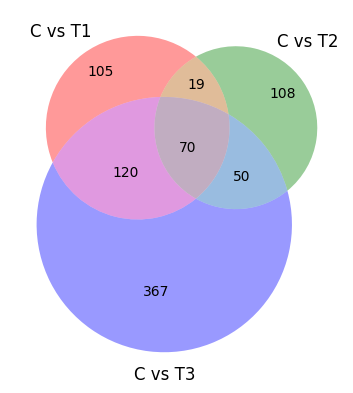

In [164]:
# Saccharina - Control vs Scenario

set1 = set(S_C_VS_T1['genes'].to_list())
set2 = set(S_C_VS_T2['genes'].to_list())
set3 = set(S_C_VS_T3['genes'].to_list())

venn3([set1, set2, set3], ('C vs T1', 'C vs T2', 'C vs T3'))
plt.savefig('DESeq2/Saccharina/venn_Saccharina_control_comparisons.png')
plt.show()

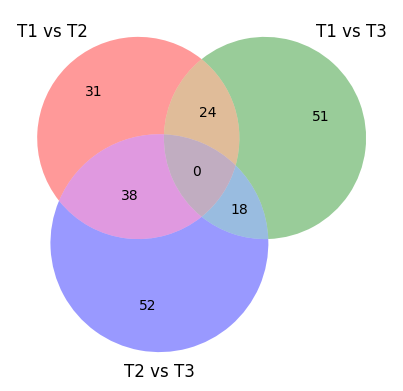

In [165]:
# Saccharina - Scenario vs Scenario 

set1 = set(S_T1_VS_T2['genes'].to_list())
set2 = set(S_T1_VS_T3['genes'].to_list())
set3 = set(S_T2_VS_T3['genes'].to_list())

venn3([set1, set2, set3], ('T1 vs T2', 'T1 vs T3', 'T2 vs T3'))
plt.savefig('DESeq2/Saccharina/venn_Saccharina_scenario_comparisons.png')
plt.show()

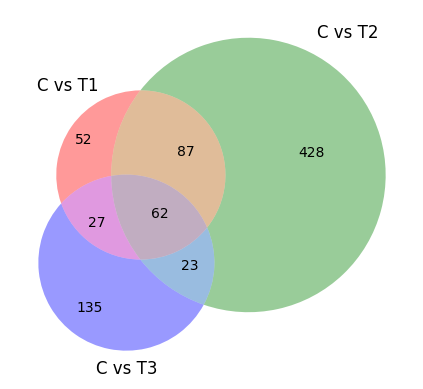

In [166]:
# Hedophylum - Control vs Scenario

set1 = set(H_C_VS_T1['genes'].to_list())
set2 = set(H_C_VS_T2['genes'].to_list())
set3 = set(H_C_VS_T3['genes'].to_list())

venn3([set1, set2, set3], ('C vs T1', 'C vs T2', 'C vs T3'))
plt.savefig('DESeq2/Hedophylum/venn_Hedophylum_control_comparisons.png')
plt.show()

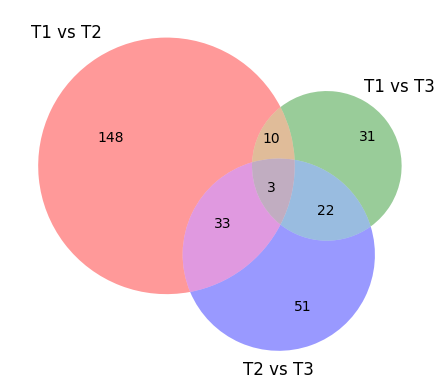

In [167]:
# Saccharina - Scenario vs Scenario 

set1 = set(H_T1_VS_T2['genes'].to_list())
set2 = set(H_T1_VS_T3['genes'].to_list())
set3 = set(H_T2_VS_T3['genes'].to_list())

venn3([set1, set2, set3], ('T1 vs T2', 'T1 vs T3', 'T2 vs T3'))
plt.savefig('DESeq2/Hedophylum/venn_Hedophylum_scenario_comparisons.png')
plt.show()

In [168]:
print(H_C_VS_T2_annot.to_string())

                      genes     baseMean  log2FoldChange     lfcSE      stat        pvalue          padj      pfam_annotation pfam_code                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          function  protein                                                                                 pfam_domains
0      TRINITY_DN1842_c2_g1   339.244311      -13.908677  1.862979 -7.465826  8.277855e-14  5.594588e-10    101 Inhibitor_I29   PF08246                                                                                                 

In [169]:
stressSaccharina = ['TRINITY_DN92281_c0_g1','TRINITY_DN16306_c0_g1','TRINITY_DN18681_c0_g2','TRINITY_DN23157_c0_g1','TRINITY_DN9893_c0_g1','TRINITY_DN11722_c0_g1','TRINITY_DN11303_c0_g1','TRINITY_DN60697_c0_g1','TRINITY_DN21336_c0_g1','TRINITY_DN18767_c0_g1','TRINITY_DN43976_c0_g1','TRINITY_DN20203_c0_g1','TRINITY_DN46558_c0_g1','TRINITY_DN116648_c0_g1','TRINITY_DN78007_c0_g1','TRINITY_DN62995_c0_g1','TRINITY_DN74328_c0_g1','TRINITY_DN4563_c2_g1','TRINITY_DN65921_c0_g1','TRINITY_DN20048_c0_g1']
metaboSaccharina = ['TRINITY_DN8503_c1_g1','TRINITY_DN12661_c0_g1','TRINITY_DN10009_c0_g1','TRINITY_DN4254_c0_g1','TRINITY_DN19924_c0_g1','TRINITY_DN3873_c5_g1','TRINITY_DN58822_c0_g1','TRINITY_DN5217_c0_g1','TRINITY_DN76013_c0_g1','TRINITY_DN13514_c0_g1','TRINITY_DN12703_c0_g1','TRINITY_DN20429_c0_g1','TRINITY_DN14283_c1_g1','TRINITY_DN10836_c0_g1','TRINITY_DN73648_c0_g1','TRINITY_DN10639_c0_g1','TRINITY_DN13782_c0_g1','TRINITY_DN4954_c0_g1','TRINITY_DN7941_c0_g1','TRINITY_DN799_c0_g2','TRINITY_DN20910_c0_g1','TRINITY_DN24723_c0_g1','TRINITY_DN4254_c0_g1','TRINITY_DN80326_c0_g1','TRINITY_DN79942_c0_g1','TRINITY_DN17495_c0_g1','TRINITY_DN21099_c0_g1','TRINITY_DN58675_c0_g1','TRINITY_DN59859_c1_g1','TRINITY_DN30623_c0_g1','TRINITY_DN83930_c0_g1','TRINITY_DN18814_c0_g1','TRINITY_DN10720_c0_g1']
signalingSaccharina = ['TRINITY_DN17131_c0_g1','TRINITY_DN4290_c0_g1','TRINITY_DN116273_c0_g1','TRINITY_DN69447_c0_g1','TRINITY_DN1428_c0_g3','TRINITY_DN18015_c1_g1','TRINITY_DN72939_c0_g1','TRINITY_DN89193_c0_g1','TRINITY_DN10965_c0_g1','TRINITY_DN12680_c0_g1','TRINITY_DN11621_c0_g1','TRINITY_DN21705_c0_g1','TRINITY_DN108291_c0_g1','TRINITY_DN53670_c0_g1','TRINITY_DN20256_c0_g1','TRINITY_DN60376_c0_g1','TRINITY_DN108597_c0_g1','TRINITY_DN8324_c0_g2','TRINITY_DN118380_c0_g1','TRINITY_DN42161_c0_g1','TRINITY_DN67598_c0_g1','TRINITY_DN85933_c0_g1','TRINITY_DN61696_c0_g1','TRINITY_DN6039_c0_g1']
transportSaccharina = ['TRINITY_DN814_c0_g1','TRINITY_DN21116_c0_g1','TRINITY_DN56547_c0_g1','TRINITY_DN1127_c0_g1','TRINITY_DN90095_c0_g1']
geneticSaccharina = ['TRINITY_DN64126_c0_g1','TRINITY_DN112799_c0_g1','TRINITY_DN14840_c0_g1','TRINITY_DN317_c0_g1','TRINITY_DN47318_c0_g1','TRINITY_DN99113_c0_g1','TRINITY_DN20417_c0_g1','TRINITY_DN16365_c0_g1','TRINITY_DN76887_c0_g1','TRINITY_DN19568_c0_g1','TRINITY_DN82190_c0_g1','TRINITY_DN26513_c0_g1','TRINITY_DN23114_c0_g1','TRINITY_DN95301_c0_g1','TRINITY_DN75977_c0_g1','TRINITY_DN12311_c0_g1','TRINITY_DN9436_c0_g1','TRINITY_DN9448_c0_g1','TRINITY_DN7884_c0_g1','TRINITY_DN73781_c0_g1','TRINITY_DN8605_c0_g1','TRINITY_DN10431_c0_g1','TRINITY_DN9192_c0_g1','TRINITY_DN13305_c1_g1','TRINITY_DN46462_c0_g1','TRINITY_DN8917_c0_g1','TRINITY_DN18307_c0_g1','TRINITY_DN9951_c0_g1','TRINITY_DN25603_c0_g1','TRINITY_DN17821_c0_g1','TRINITY_DN88977_c0_g1','TRINITY_DN76630_c0_g1','TRINITY_DN24787_c0_g2','TRINITY_DN97406_c0_g1','TRINITY_DN58502_c0_g1','TRINITY_DN12781_c0_g1','TRINITY_DN69047_c0_g1','TRINITY_DN12318_c0_g1','TRINITY_DN92854_c0_g1','TRINITY_DN60940_c0_g1','TRINITY_DN13539_c0_g1','TRINITY_DN6617_c0_g1','TRINITY_DN14896_c0_g1','TRINITY_DN113339_c0_g1','TRINITY_DN41843_c0_g1','TRINITY_DN23379_c0_g1','TRINITY_DN45957_c0_g1','TRINITY_DN25379_c0_g1','TRINITY_DN77440_c0_g1','TRINITY_DN94618_c0_g1','TRINITY_DN3939_c0_g1','TRINITY_DN20162_c0_g2','TRINITY_DN91219_c0_g1','TRINITY_DN76659_c0_g1','TRINITY_DN18512_c0_g1','TRINITY_DN59249_c0_g1','TRINITY_DN89053_c0_g1','TRINITY_DN6822_c0_g1','TRINITY_DN73479_c0_g1','TRINITY_DN19674_c0_g1','TRINITY_DN19979_c0_g1','TRINITY_DN23134_c0_g1','TRINITY_DN66658_c0_g1','TRINITY_DN59410_c0_g1','TRINITY_DN77109_c0_g1','TRINITY_DN108719_c0_g1','TRINITY_DN75704_c0_g1','TRINITY_DN96253_c0_g1','TRINITY_DN43534_c0_g1','TRINITY_DN8042_c0_g1','TRINITY_DN24081_c0_g1','TRINITY_DN61343_c0_g1','TRINITY_DN91641_c0_g1','TRINITY_DN117470_c0_g1','TRINITY_DN91717_c0_g1','TRINITY_DN110460_c0_g1','TRINITY_DN27892_c0_g1','TRINITY_DN60356_c0_g1']
cytoskeletonSaccharina = ['TRINITY_DN3176_c0_g1','TRINITY_DN5258_c0_g2','TRINITY_DN11849_c3_g1','TRINITY_DN10013_c0_g1','TRINITY_DN9619_c0_g1','TRINITY_DN12026_c2_g1','TRINITY_DN1198_c1_g1','TRINITY_DN102377_c0_g1','TRINITY_DN89531_c0_g1','TRINITY_DN15370_c0_g1','TRINITY_DN16373_c0_g1','TRINITY_DN983_c1_g1','TRINITY_DN7401_c1_g1','TRINITY_DN19923_c0_g1','TRINITY_DN91429_c0_g1','TRINITY_DN11849_c1_g1','TRINITY_DN29274_c0_g1','TRINITY_DN9369_c0_g1','TRINITY_DN14918_c0_g1','TRINITY_DN11049_c0_g1','TRINITY_DN61695_c0_g1','TRINITY_DN983_c1_g1','TRINITY_DN15935_c0_g1','TRINITY_DN58351_c0_g1','TRINITY_DN3126_c0_g1','TRINITY_DN7433_c0_g1','TRINITY_DN3994_c0_g1','TRINITY_DN9584_c0_g2','TRINITY_DN10488_c1_g1','TRINITY_DN7441_c0_g1','TRINITY_DN10239_c0_g1','TRINITY_DN21896_c0_g1','TRINITY_DN983_c0_g1','TRINITY_DN89498_c0_g1']
photoSaccharina = ['TRINITY_DN108660_c0_g1','TRINITY_DN12941_c0_g1','TRINITY_DN9800_c0_g1','TRINITY_DN15248_c3_g1','TRINITY_DN19634_c0_g1','TRINITY_DN1010_c2_g1','TRINITY_DN18238_c0_g1','TRINITY_DN10730_c0_g1','TRINITY_DN19818_c0_g1','TRINITY_DN14889_c0_g1','TRINITY_DN15248_c0_g2','TRINITY_DN20457_c1_g1']

In [170]:
# For heatmaps (ALL comparisons, not only with control)

stressSaccharinaHeatmap = ['TRINITY_DN92281_c0_g1','TRINITY_DN16306_c0_g1','TRINITY_DN18681_c0_g2','TRINITY_DN23157_c0_g1','TRINITY_DN9893_c0_g1','TRINITY_DN11722_c0_g1','TRINITY_DN11303_c0_g1','TRINITY_DN60697_c0_g1','TRINITY_DN21336_c0_g1','TRINITY_DN18767_c0_g1','TRINITY_DN43976_c0_g1','TRINITY_DN20203_c0_g1','TRINITY_DN46558_c0_g1','TRINITY_DN116648_c0_g1','TRINITY_DN78007_c0_g1','TRINITY_DN62995_c0_g1','TRINITY_DN74328_c0_g1','TRINITY_DN4563_c2_g1','TRINITY_DN65921_c0_g1','TRINITY_DN20048_c0_g1','TRINITY_DN13307_c0_g1']
metaboSaccharinaHeatmap = ['TRINITY_DN8503_c1_g1','TRINITY_DN12661_c0_g1','TRINITY_DN10009_c0_g1','TRINITY_DN4254_c0_g1','TRINITY_DN19924_c0_g1','TRINITY_DN3873_c5_g1','TRINITY_DN58822_c0_g1','TRINITY_DN5217_c0_g1','TRINITY_DN76013_c0_g1','TRINITY_DN13514_c0_g1','TRINITY_DN12703_c0_g1','TRINITY_DN20429_c0_g1','TRINITY_DN14283_c1_g1','TRINITY_DN10836_c0_g1','TRINITY_DN73648_c0_g1','TRINITY_DN10639_c0_g1','TRINITY_DN13782_c0_g1','TRINITY_DN4954_c0_g1','TRINITY_DN7941_c0_g1','TRINITY_DN799_c0_g2','TRINITY_DN20910_c0_g1','TRINITY_DN24723_c0_g1','TRINITY_DN4254_c0_g1','TRINITY_DN80326_c0_g1','TRINITY_DN79942_c0_g1','TRINITY_DN17495_c0_g1','TRINITY_DN21099_c0_g1','TRINITY_DN58675_c0_g1','TRINITY_DN59859_c1_g1','TRINITY_DN30623_c0_g1','TRINITY_DN83930_c0_g1','TRINITY_DN18814_c0_g1','TRINITY_DN10720_c0_g1','TRINITY_DN5442_c0_g1']
signalingSaccharinaHeatmap = ['TRINITY_DN17131_c0_g1','TRINITY_DN4290_c0_g1','TRINITY_DN116273_c0_g1','TRINITY_DN69447_c0_g1','TRINITY_DN1428_c0_g3','TRINITY_DN18015_c1_g1','TRINITY_DN72939_c0_g1','TRINITY_DN89193_c0_g1','TRINITY_DN10965_c0_g1','TRINITY_DN12680_c0_g1','TRINITY_DN11621_c0_g1','TRINITY_DN21705_c0_g1','TRINITY_DN108291_c0_g1','TRINITY_DN53670_c0_g1','TRINITY_DN20256_c0_g1','TRINITY_DN60376_c0_g1','TRINITY_DN108597_c0_g1','TRINITY_DN8324_c0_g2','TRINITY_DN118380_c0_g1','TRINITY_DN42161_c0_g1','TRINITY_DN67598_c0_g1','TRINITY_DN85933_c0_g1','TRINITY_DN61696_c0_g1','TRINITY_DN6039_c0_g1','TRINITY_DN42373_c0_g1']
transportSaccharinaHeatmap = ['TRINITY_DN814_c0_g1','TRINITY_DN21116_c0_g1','TRINITY_DN56547_c0_g1','TRINITY_DN1127_c0_g1','TRINITY_DN90095_c0_g1','TRINITY_DN59144_c0_g1']
geneticSaccharinaHeatmap = ['TRINITY_DN64126_c0_g1','TRINITY_DN112799_c0_g1','TRINITY_DN14840_c0_g1','TRINITY_DN317_c0_g1','TRINITY_DN47318_c0_g1','TRINITY_DN99113_c0_g1','TRINITY_DN20417_c0_g1','TRINITY_DN16365_c0_g1','TRINITY_DN76887_c0_g1','TRINITY_DN19568_c0_g1','TRINITY_DN82190_c0_g1','TRINITY_DN26513_c0_g1','TRINITY_DN23114_c0_g1','TRINITY_DN95301_c0_g1','TRINITY_DN75977_c0_g1','TRINITY_DN12311_c0_g1','TRINITY_DN9436_c0_g1','TRINITY_DN9448_c0_g1','TRINITY_DN7884_c0_g1','TRINITY_DN73781_c0_g1','TRINITY_DN8605_c0_g1','TRINITY_DN10431_c0_g1','TRINITY_DN9192_c0_g1','TRINITY_DN13305_c1_g1','TRINITY_DN46462_c0_g1','TRINITY_DN8917_c0_g1','TRINITY_DN18307_c0_g1','TRINITY_DN9951_c0_g1','TRINITY_DN25603_c0_g1','TRINITY_DN17821_c0_g1','TRINITY_DN88977_c0_g1','TRINITY_DN76630_c0_g1','TRINITY_DN24787_c0_g2','TRINITY_DN97406_c0_g1','TRINITY_DN58502_c0_g1','TRINITY_DN12781_c0_g1','TRINITY_DN69047_c0_g1','TRINITY_DN12318_c0_g1','TRINITY_DN92854_c0_g1','TRINITY_DN60940_c0_g1','TRINITY_DN13539_c0_g1','TRINITY_DN6617_c0_g1','TRINITY_DN14896_c0_g1','TRINITY_DN113339_c0_g1','TRINITY_DN41843_c0_g1','TRINITY_DN23379_c0_g1','TRINITY_DN45957_c0_g1','TRINITY_DN25379_c0_g1','TRINITY_DN77440_c0_g1','TRINITY_DN94618_c0_g1','TRINITY_DN3939_c0_g1','TRINITY_DN20162_c0_g2','TRINITY_DN91219_c0_g1','TRINITY_DN76659_c0_g1','TRINITY_DN18512_c0_g1','TRINITY_DN59249_c0_g1','TRINITY_DN89053_c0_g1','TRINITY_DN6822_c0_g1','TRINITY_DN73479_c0_g1','TRINITY_DN19674_c0_g1','TRINITY_DN19979_c0_g1','TRINITY_DN23134_c0_g1','TRINITY_DN66658_c0_g1','TRINITY_DN59410_c0_g1','TRINITY_DN77109_c0_g1','TRINITY_DN108719_c0_g1','TRINITY_DN75704_c0_g1','TRINITY_DN96253_c0_g1','TRINITY_DN43534_c0_g1','TRINITY_DN8042_c0_g1','TRINITY_DN24081_c0_g1','TRINITY_DN61343_c0_g1','TRINITY_DN91641_c0_g1','TRINITY_DN117470_c0_g1','TRINITY_DN91717_c0_g1','TRINITY_DN110460_c0_g1','TRINITY_DN27892_c0_g1','TRINITY_DN60356_c0_g1','TRINITY_DN43269_c0_g1','TRINITY_DN5510_c0_g1','TRINITY_DN3882_c0_g1']
cytoskeletonSaccharinaHeatmap = ['TRINITY_DN3176_c0_g1','TRINITY_DN5258_c0_g2','TRINITY_DN11849_c3_g1','TRINITY_DN10013_c0_g1','TRINITY_DN9619_c0_g1','TRINITY_DN12026_c2_g1','TRINITY_DN1198_c1_g1','TRINITY_DN102377_c0_g1','TRINITY_DN89531_c0_g1','TRINITY_DN15370_c0_g1','TRINITY_DN16373_c0_g1','TRINITY_DN983_c1_g1','TRINITY_DN7401_c1_g1','TRINITY_DN19923_c0_g1','TRINITY_DN91429_c0_g1','TRINITY_DN11849_c1_g1','TRINITY_DN29274_c0_g1','TRINITY_DN9369_c0_g1','TRINITY_DN14918_c0_g1','TRINITY_DN11049_c0_g1','TRINITY_DN61695_c0_g1','TRINITY_DN983_c1_g1','TRINITY_DN15935_c0_g1','TRINITY_DN58351_c0_g1','TRINITY_DN3126_c0_g1','TRINITY_DN7433_c0_g1','TRINITY_DN3994_c0_g1','TRINITY_DN9584_c0_g2','TRINITY_DN10488_c1_g1','TRINITY_DN7441_c0_g1','TRINITY_DN10239_c0_g1','TRINITY_DN21896_c0_g1','TRINITY_DN983_c0_g1','TRINITY_DN89498_c0_g1','TRINITY_DN7401_c0_g1','TRINITY_DN1198_c2_g1']
photoSaccharinaHeatmap = ['TRINITY_DN108660_c0_g1','TRINITY_DN12941_c0_g1','TRINITY_DN9800_c0_g1','TRINITY_DN15248_c3_g1','TRINITY_DN19634_c0_g1','TRINITY_DN1010_c2_g1','TRINITY_DN18238_c0_g1','TRINITY_DN10730_c0_g1','TRINITY_DN19818_c0_g1','TRINITY_DN14889_c0_g1','TRINITY_DN15248_c0_g2','TRINITY_DN20457_c1_g1','TRINITY_DN16192_c0_g3']

In [171]:
print(S_C_VS_T2_annot.to_string())

                     genes     baseMean  log2FoldChange     lfcSE      stat        pvalue          padj      pfam_annotation pfam_code                                                                                                                                                                                                                                                                                                                                                                                               function   protein                                     pfam_domains
0     TRINITY_DN4254_c0_g1   222.534278       -9.347084  1.356082 -6.892715  5.473737e-12  4.338940e-08   224 Methyltransf_3   PF01596                                                                                                                                                                                                                                                                                         

In [172]:
stressHedophylum = ['TRINITY_DN13072_c0_g1','TRINITY_DN28747_c0_g1','TRINITY_DN2598_c0_g1','TRINITY_DN1813_c0_g1','TRINITY_DN6431_c0_g1','TRINITY_DN5949_c0_g1','TRINITY_DN13109_c0_g1','TRINITY_DN102789_c0_g1','TRINITY_DN35438_c0_g1','TRINITY_DN2598_c0_g1','TRINITY_DN96457_c0_g1']
metaboHedophylum = ['TRINITY_DN1842_c2_g1','TRINITY_DN18841_c0_g1','TRINITY_DN289_c3_g1','TRINITY_DN1060_c0_g1','TRINITY_DN34493_c0_g1','TRINITY_DN568_c0_g1','TRINITY_DN35367_c0_g1','TRINITY_DN50279_c0_g1','TRINITY_DN2738_c0_g1','TRINITY_DN96948_c0_g1','TRINITY_DN18384_c0_g1','TRINITY_DN1625_c0_g1','TRINITY_DN5761_c0_g1','TRINITY_DN100065_c0_g1','TRINITY_DN1930_c0_g1','TRINITY_DN64827_c0_g1','TRINITY_DN1842_c1_g1','TRINITY_DN8625_c0_g1','TRINITY_DN5860_c0_g2','TRINITY_DN3887_c1_g1','TRINITY_DN561_c1_g1','TRINITY_DN21438_c0_g1','TRINITY_DN41323_c0_g1','TRINITY_DN1060_c0_g1','TRINITY_DN4950_c0_g2','TRINITY_DN66660_c0_g1','TRINITY_DN8061_c0_g1','TRINITY_DN13605_c0_g1','TRINITY_DN6525_c0_g1','TRINITY_DN65680_c0_g1','TRINITY_DN38406_c0_g1','TRINITY_DN10906_c0_g1','TRINITY_DN12185_c0_g1','TRINITY_DN35243_c0_g1','TRINITY_DN37870_c0_g1','TRINITY_DN35272_c0_g1','TRINITY_DN52768_c0_g1','TRINITY_DN6767_c1_g1','TRINITY_DN35943_c0_g1','TRINITY_DN10968_c0_g1','TRINITY_DN39358_c0_g1','TRINITY_DN569_c0_g1','TRINITY_DN5860_c0_g1']
signalingHedophylum = ['TRINITY_DN37737_c0_g1','TRINITY_DN2117_c1_g1','TRINITY_DN3230_c0_g2','TRINITY_DN9696_c0_g1','TRINITY_DN97918_c0_g1','TRINITY_DN2053_c2_g1','TRINITY_DN1731_c0_g1','TRINITY_DN519_c0_g1','TRINITY_DN4112_c0_g1','TRINITY_DN83778_c0_g1']
transportHedophylum = ['TRINITY_DN7562_c0_g1','TRINITY_DN98471_c0_g1','TRINITY_DN9660_c0_g1','TRINITY_DN38514_c0_g1','TRINITY_DN18985_c0_g1','TRINITY_DN4052_c0_g1','TRINITY_DN14225_c0_g1']
geneticHedophylum = ['TRINITY_DN1237_c0_g1','TRINITY_DN3249_c1_g1','TRINITY_DN7600_c0_g1','TRINITY_DN4326_c0_g1','TRINITY_DN6305_c0_g1','TRINITY_DN42754_c0_g1','TRINITY_DN20706_c0_g1','TRINITY_DN281_c0_g1','TRINITY_DN20211_c0_g1','TRINITY_DN68173_c0_g1','TRINITY_DN86483_c0_g1','TRINITY_DN8433_c0_g1','TRINITY_DN2398_c0_g1','TRINITY_DN12541_c0_g1','TRINITY_DN20706_c0_g1','TRINITY_DN4055_c0_g1','TRINITY_DN68173_c0_g1','TRINITY_DN6876_c0_g1','TRINITY_DN97287_c0_g1','TRINITY_DN99383_c0_g1','TRINITY_DN2807_c5_g1','TRINITY_DN5914_c0_g1','TRINITY_DN12207_c0_g1','TRINITY_DN1281_c0_g1','TRINITY_DN6004_c0_g1','TRINITY_DN14382_c0_g1','TRINITY_DN12488_c0_g2','TRINITY_DN38448_c0_g1','TRINITY_DN49935_c1_g1','TRINITY_DN81903_c0_g1','TRINITY_DN2184_c0_g2','TRINITY_DN99314_c0_g1','TRINITY_DN83838_c0_g1','TRINITY_DN26408_c0_g1','TRINITY_DN1097_c14_g1','TRINITY_DN49889_c0_g1','TRINITY_DN15686_c0_g1','TRINITY_DN3249_c0_g1','TRINITY_DN85605_c0_g1','TRINITY_DN98006_c0_g1','TRINITY_DN11267_c0_g1','TRINITY_DN38433_c0_g1']
cytoskeletonHedophylum = ['TRINITY_DN9161_c1_g1','TRINITY_DN52157_c0_g1','TRINITY_DN12291_c1_g1','TRINITY_DN3554_c1_g1','TRINITY_DN66100_c0_g1']
photoHedophylum = ['TRINITY_DN18716_c0_g1','TRINITY_DN2853_c0_g2','TRINITY_DN388_c0_g1','TRINITY_DN8582_c0_g2','TRINITY_DN7031_c0_g1','TRINITY_DN25860_c0_g1','TRINITY_DN81118_c0_g1','TRINITY_DN8946_c0_g1','TRINITY_DN24679_c0_g1','TRINITY_DN8582_c0_g1','TRINITY_DN2853_c0_g1','TRINITY_DN1535_c0_g1','TRINITY_DN9272_c0_g1']

In [173]:
# For heatmaps (ALL comparisons, not only with control)

stressHedophylumHeatmap = ['TRINITY_DN13072_c0_g1','TRINITY_DN28747_c0_g1','TRINITY_DN2598_c0_g1','TRINITY_DN1813_c0_g1','TRINITY_DN6431_c0_g1','TRINITY_DN5949_c0_g1','TRINITY_DN13109_c0_g1','TRINITY_DN102789_c0_g1','TRINITY_DN35438_c0_g1','TRINITY_DN2598_c0_g1','TRINITY_DN96457_c0_g1','TRINITY_DN63_c2_g1','TRINITY_DN18952_c0_g1']
metaboHedophylumHeatmap = ['TRINITY_DN1842_c2_g1','TRINITY_DN18841_c0_g1','TRINITY_DN289_c3_g1','TRINITY_DN1060_c0_g1','TRINITY_DN34493_c0_g1','TRINITY_DN568_c0_g1','TRINITY_DN35367_c0_g1','TRINITY_DN50279_c0_g1','TRINITY_DN2738_c0_g1','TRINITY_DN96948_c0_g1','TRINITY_DN18384_c0_g1','TRINITY_DN1625_c0_g1','TRINITY_DN5761_c0_g1','TRINITY_DN100065_c0_g1','TRINITY_DN1930_c0_g1','TRINITY_DN64827_c0_g1','TRINITY_DN1842_c1_g1','TRINITY_DN8625_c0_g1','TRINITY_DN5860_c0_g2','TRINITY_DN3887_c1_g1','TRINITY_DN561_c1_g1','TRINITY_DN21438_c0_g1','TRINITY_DN41323_c0_g1','TRINITY_DN1060_c0_g1','TRINITY_DN4950_c0_g2','TRINITY_DN66660_c0_g1','TRINITY_DN8061_c0_g1','TRINITY_DN13605_c0_g1','TRINITY_DN6525_c0_g1','TRINITY_DN65680_c0_g1','TRINITY_DN38406_c0_g1','TRINITY_DN10906_c0_g1','TRINITY_DN12185_c0_g1','TRINITY_DN35243_c0_g1','TRINITY_DN37870_c0_g1','TRINITY_DN35272_c0_g1','TRINITY_DN52768_c0_g1','TRINITY_DN6767_c1_g1','TRINITY_DN35943_c0_g1','TRINITY_DN10968_c0_g1','TRINITY_DN39358_c0_g1','TRINITY_DN569_c0_g1','TRINITY_DN5860_c0_g1','TRINITY_DN303_c0_g1','TRINITY_DN11593_c0_g1','TRINITY_DN11087_c0_g1','TRINITY_DN12224_c0_g1','TRINITY_DN50480_c0_g1','TRINITY_DN34269_c0_g1']
signalingHedophylumHeatmap = ['TRINITY_DN37737_c0_g1','TRINITY_DN2117_c1_g1','TRINITY_DN3230_c0_g2','TRINITY_DN9696_c0_g1','TRINITY_DN97918_c0_g1','TRINITY_DN2053_c2_g1','TRINITY_DN1731_c0_g1','TRINITY_DN519_c0_g1','TRINITY_DN4112_c0_g1','TRINITY_DN83778_c0_g1','TRINITY_DN16759_c0_g1','TRINITY_DN9809_c0_g1','TRINITY_DN2302_c0_g1']
transportHedophylumHeatmap = ['TRINITY_DN7562_c0_g1','TRINITY_DN98471_c0_g1','TRINITY_DN9660_c0_g1','TRINITY_DN38514_c0_g1','TRINITY_DN18985_c0_g1','TRINITY_DN4052_c0_g1','TRINITY_DN14225_c0_g1','TRINITY_DN12987_c0_g1','TRINITY_DN6064_c0_g1','TRINITY_DN2937_c0_g1']
geneticHedophylumHeatmap = ['TRINITY_DN1237_c0_g1','TRINITY_DN3249_c1_g1','TRINITY_DN7600_c0_g1','TRINITY_DN4326_c0_g1','TRINITY_DN6305_c0_g1','TRINITY_DN42754_c0_g1','TRINITY_DN20706_c0_g1','TRINITY_DN281_c0_g1','TRINITY_DN20211_c0_g1','TRINITY_DN68173_c0_g1','TRINITY_DN86483_c0_g1','TRINITY_DN8433_c0_g1','TRINITY_DN2398_c0_g1','TRINITY_DN12541_c0_g1','TRINITY_DN20706_c0_g1','TRINITY_DN4055_c0_g1','TRINITY_DN68173_c0_g1','TRINITY_DN6876_c0_g1','TRINITY_DN97287_c0_g1','TRINITY_DN99383_c0_g1','TRINITY_DN2807_c5_g1','TRINITY_DN5914_c0_g1','TRINITY_DN12207_c0_g1','TRINITY_DN1281_c0_g1','TRINITY_DN6004_c0_g1','TRINITY_DN14382_c0_g1','TRINITY_DN12488_c0_g2','TRINITY_DN38448_c0_g1','TRINITY_DN49935_c1_g1','TRINITY_DN81903_c0_g1','TRINITY_DN2184_c0_g2','TRINITY_DN99314_c0_g1','TRINITY_DN83838_c0_g1','TRINITY_DN26408_c0_g1','TRINITY_DN1097_c14_g1','TRINITY_DN49889_c0_g1','TRINITY_DN15686_c0_g1','TRINITY_DN3249_c0_g1','TRINITY_DN85605_c0_g1','TRINITY_DN98006_c0_g1','TRINITY_DN11267_c0_g1','TRINITY_DN38433_c0_g1','TRINITY_DN10957_c0_g1','TRINITY_DN81887_c0_g1','TRINITY_DN2948_c0_g1','TRINITY_DN21587_c0_g1']
cytoskeletonHedophylumHeatmap = ['TRINITY_DN9161_c1_g1','TRINITY_DN52157_c0_g1','TRINITY_DN12291_c1_g1','TRINITY_DN3554_c1_g1','TRINITY_DN66100_c0_g1']
photoHedophylumHeatmap = ['TRINITY_DN18716_c0_g1','TRINITY_DN2853_c0_g2','TRINITY_DN388_c0_g1','TRINITY_DN8582_c0_g2','TRINITY_DN7031_c0_g1','TRINITY_DN25860_c0_g1','TRINITY_DN81118_c0_g1','TRINITY_DN8946_c0_g1','TRINITY_DN24679_c0_g1','TRINITY_DN8582_c0_g1','TRINITY_DN2853_c0_g1','TRINITY_DN1535_c0_g1','TRINITY_DN9272_c0_g1','TRINITY_DN6838_c0_g1','TRINITY_DN38785_c0_g1','TRINITY_DN23243_c0_g1','TRINITY_DN85661_c0_g1','TRINITY_DN1924_c1_g1','TRINITY_DN51789_c0_g1','TRINITY_DN55947_c0_g1','TRINITY_DN34654_c0_g1','TRINITY_DN61532_c0_g1','TRINITY_DN96949_c0_g1','TRINITY_DN2487_c0_g1','TRINITY_DN28175_c0_g1']

In [174]:
all_annot_Saccharina = pd.concat([S_C_VS_T1_annot,S_C_VS_T2_annot,S_C_VS_T3_annot,S_T1_VS_T2_annot,S_T1_VS_T3_annot,S_T2_VS_T3_annot],join='outer')

In [175]:
all_annot_Hedophylum = pd.concat([H_C_VS_T1_annot,H_C_VS_T2_annot,H_C_VS_T3_annot,H_T1_VS_T2_annot,H_T1_VS_T3_annot,H_T2_VS_T3_annot],join='outer')

In [176]:
def candidateListGenerator(all_annot,species,genesList,outputname):
    all_annot_trimmed = all_annot.loc[all_annot['genes'].isin(genesList)].reset_index(drop=True)
    pfam_annot_trim = [] 
    pfam_annot = all_annot_trimmed['pfam_annotation']
    for i in pfam_annot:
        annot = i.split(' ')[1]
        pfam_annot_trim.append(annot)
    all_annot_trimmed = all_annot_trimmed[['genes']]
    all_annot_trimmed['pfam_annotation'] = np.array(pfam_annot_trim)
    all_annot_trimmed = all_annot_trimmed.drop_duplicates(subset='genes',keep='first', inplace=False, ignore_index=True)
    all_annot_trimmed.to_csv(rPath+'/DESeq2/'+species+'/'+outputname+'.csv',index=False,header=True)

In [177]:
candidateListGenerator(all_annot_Saccharina,'Saccharina',stressSaccharinaHeatmap,'stressList')
candidateListGenerator(all_annot_Saccharina,'Saccharina',metaboSaccharinaHeatmap,'metaboList')
candidateListGenerator(all_annot_Saccharina,'Saccharina',transportSaccharinaHeatmap,'transportList')
candidateListGenerator(all_annot_Saccharina,'Saccharina',photoSaccharinaHeatmap,'photoList')
candidateListGenerator(all_annot_Saccharina,'Saccharina',signalingSaccharinaHeatmap,'signalingList')
candidateListGenerator(all_annot_Saccharina,'Saccharina',geneticSaccharinaHeatmap,'geneticList')
candidateListGenerator(all_annot_Saccharina,'Saccharina',cytoskeletonSaccharinaHeatmap,'cytoskeletonList')

In [178]:
candidateListGenerator(all_annot_Hedophylum,'Hedophylum',stressHedophylumHeatmap,'stressList')
candidateListGenerator(all_annot_Hedophylum,'Hedophylum',metaboHedophylumHeatmap,'metaboList')
candidateListGenerator(all_annot_Hedophylum,'Hedophylum',transportHedophylumHeatmap,'transportList')
candidateListGenerator(all_annot_Hedophylum,'Hedophylum',photoHedophylumHeatmap,'photoList')
candidateListGenerator(all_annot_Hedophylum,'Hedophylum',signalingHedophylumHeatmap,'signalingList')
candidateListGenerator(all_annot_Hedophylum,'Hedophylum',geneticHedophylumHeatmap,'geneticList')
candidateListGenerator(all_annot_Hedophylum,'Hedophylum',cytoskeletonHedophylumHeatmap,'cytoskeletonList')

In [179]:
import plotly.graph_objs as go

In [180]:
def countExpr(species,sign,function):
    outputList = []
    dfList = []
    if species == "S":
        dfList.append(S_C_VS_T1_annot) ; dfList.append(S_C_VS_T2_annot) ; dfList.append(S_C_VS_T3_annot)
    elif species == "H":
        dfList.append(H_C_VS_T1_annot) ; dfList.append(H_C_VS_T2_annot) ; dfList.append(H_C_VS_T3_annot) 
    for i in dfList:
        count = 0
        for index,row in i.iterrows():
            if row['genes'] in function:
                expr = row['log2FoldChange']
                if (sign == 'positive' and expr > 0):
                    count += 1
                elif (sign == 'negative' and expr < 0):
                    count -=1
                elif sign =="neutral":
                    count +=1
        outputList.append(count)
    return outputList

In [189]:
data = {
    'comparison': ['T1', 'T2', 'T3'],
    'photo_pos': countExpr("S", "positive", photoSaccharina),   # Valeurs positives pour Photorespiration S
    'photo_neg': countExpr("S", "negative", photoSaccharina),   # Valeurs négatives pour Photorespiration S
    'stress_pos': countExpr("S", "positive", stressSaccharina),   # Valeurs positives pour Stress S
    'stress_neg': countExpr("S", "negative", stressSaccharina),   # Valeurs positives pour Signaling S
    'transport_pos': countExpr("S", "positive", transportSaccharina),   # Valeurs positives pour Metabo S
    'transport_neg': countExpr("S", "negative", transportSaccharina),   # Valeurs positives pour Traduction/translation S
    'signaling_pos': countExpr("S", "positive", signalingSaccharina),   # Valeurs positives pour Cytoskeleton S
    'signaling_neg': countExpr("S", "negative", signalingSaccharina),   # Valeurs négatives pour Photorespiration S
    'metabo_pos': countExpr("S", "positive", metaboSaccharina),   # Valeurs négatives pour Stress S
    'metabo_neg': countExpr("S", "negative", metaboSaccharina),   # Valeurs négatives pour Transport S
    'genetic_pos': countExpr("S", "positive", geneticSaccharina),   # Valeurs négatives pour Signaling S
    'genetic_neg': countExpr("S", "negative", geneticSaccharina),   # Valeurs négatives pour Metabo S
    'cyto_pos': countExpr("S", "positive", cytoskeletonSaccharina),   # Valeurs positives pour Cytoskeleton S
    'cyto_neg': countExpr("S", "negative", cytoskeletonSaccharina)   # Valeurs négatives pour Cytoskeleton S
}

df = pd.DataFrame(data)

fig = go.Figure()

categories = ['photo', 'stress', 'transport', 'signaling', 'metabo', 'genetic', 'cyto']
colors = ["#009E73", "#ff5252", "#DDCC77", "#ffbfcc", "#88CCEE", "#B090DA", "#003272"]
names = ['Photorespiration / Energy production', 'Stress / oxydo-reduction', 'Transport', 'Signaling', 'Metabolism', 'Transcription / translation', 'Cytoskeleton']

bar_width = 0.2  

for cat, color, name in zip(categories, colors, names):
    fig.add_trace(go.Bar(
        x=df['comparison'],
        y=df[f'{cat}_pos'],
        name=name,
        marker_color=color,
        #width=bar_width,
        marker_line_color="black",
        marker_line_width=1
    ))
    fig.add_trace(go.Bar(
        x=df['comparison'],
        y=df[f'{cat}_neg'],
        showlegend=False,
        marker_color=color,
        #width=bar_width,
        marker_line_color="black",
        marker_line_width=2,
        opacity=0.7 
    ))

fig.update_layout(
    barmode='relative',
    template='simple_white',
    xaxis=dict(
        title_text="",
        showticklabels=True,
        tickvals=[0, 1, 2],  
        ticktext=['T1', 'T2', 'T3'],
        tickfont=dict(size=18)
    ),
    yaxis=dict(
        title_text="Number of DEGs in <i>Saccharina latissima<i>",
        zeroline=True,
        zerolinewidth=2,
        zerolinecolor='black',
        title_font=dict(size=18),
        tickfont=dict(size=18)
    ),
    legend=dict(
        orientation="h",  
        yanchor="top",    
        y=1.25,          
        xanchor="center", 
        x=0.5,
        font=dict(         
            family="Arial",
            size=18
        )
    ),
    bargroupgap=0.3
)

fig.show()


In [188]:
data = {
    'comparison': ['T1', 'T2', 'T3'],
    'photo_pos': countExpr("H", "positive", photoHedophylum),   # Valeurs positives pour Photorespiration S
    'photo_neg': countExpr("H", "negative", photoHedophylum),   # Valeurs négatives pour Photorespiration S
    'stress_pos': countExpr("H", "positive", stressHedophylum),   # Valeurs positives pour Stress S
    'stress_neg': countExpr("H", "negative", stressHedophylum),   # Valeurs positives pour Signaling S
    'transport_pos': countExpr("H", "positive", transportHedophylum),   # Valeurs positives pour Metabo S
    'transport_neg': countExpr("H", "negative", transportHedophylum),   # Valeurs positives pour Traduction/translation S
    'signaling_pos': countExpr("H", "positive", signalingHedophylum),   # Valeurs positives pour Cytoskeleton S
    'signaling_neg': countExpr("H", "negative", signalingHedophylum),   # Valeurs négatives pour Photorespiration S
    'metabo_pos': countExpr("H", "positive", metaboHedophylum),   # Valeurs négatives pour Stress S
    'metabo_neg': countExpr("H", "negative", metaboHedophylum),   # Valeurs négatives pour Transport S
    'genetic_pos': countExpr("H", "positive", geneticHedophylum),   # Valeurs négatives pour Signaling S
    'genetic_neg': countExpr("H", "negative", geneticHedophylum),   # Valeurs négatives pour Metabo S
    'cyto_pos': countExpr("H", "positive", cytoskeletonHedophylum),   # Valeurs positives pour Cytoskeleton S
    'cyto_neg': countExpr("H", "negative", cytoskeletonHedophylum)   # Valeurs négatives pour Cytoskeleton S
}

df = pd.DataFrame(data)

fig = go.Figure()

categories = ['photo', 'stress', 'transport', 'signaling', 'metabo', 'genetic', 'cyto']
colors = ["#009E73", "#ff5252", "#DDCC77", "#ffbfcc", "#88CCEE", "#B090DA", "#003272"]
names = ['Photorespiration / Energy production', 'Stress / oxydo-reduction', 'Transport', 'Signaling', 'Metabolism', 'Transcription / translation', 'Cytoskeleton']

bar_width = 0.2  

for cat, color, name in zip(categories, colors, names):
    fig.add_trace(go.Bar(
        x=df['comparison'],
        y=df[f'{cat}_pos'],
        name=name,
        marker_color=color,
        #width=bar_width,
        marker_line_color="black",
        marker_line_width=1
    ))
    fig.add_trace(go.Bar(
        x=df['comparison'],
        y=df[f'{cat}_neg'],
        showlegend=False,
        marker_color=color,
        #width=bar_width,
        marker_line_color="black",
        marker_line_width=2,
        opacity=0.7 
    ))

fig.update_layout(
    barmode='relative',
    template='simple_white',
    xaxis=dict(
        title_text="",
        showticklabels=True,
        tickvals=[0, 1, 2],  
        ticktext=['T1', 'T2', 'T3'],
        tickfont=dict(size=18)
    ),
    yaxis=dict(
        title_text="Number of DEGs in <i>Hedophyllum nigripes<i>",
        zeroline=True,
        zerolinewidth=2,
        zerolinecolor='black',
        title_font=dict(size=18),
        tickfont=dict(size=18)
    ),
    legend=dict(
        orientation="h",  
        yanchor="top",    
        y=1.25,          
        xanchor="center", 
        x=0.5,
        font=dict(         
            family="Arial",
            size=18
        )
    ),
    bargroupgap=0.3
)

fig.show()
